In [1]:
import pandas as pd
import numpy as np


import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
 

import acquire as a
import prepare as p
import wrangle as w
import explore as exp

# Acquire

In [2]:
def read_csv_file():
    df = pd.read_csv('combined_wine_data.csv')
    return df

df = read_csv_file()
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  
0      8.8        6  White      1  
1      9.5        6  White      1  
2     10.1        6  White      1  
3      9.9        6  White      1  
4      9.9        6  White      1

In [3]:
df['bound_sulfur_dioxide'] = (df.total_sulfur_dioxide - df.free_sulfur_dioxide)
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
0         8.8        6  White      1                 125.0  
1         9.5        6  White      1                 118.0  
2        10.1        6  White      1                  67.0  
3         9.9        6  White      1                 139.0  
4         9.9        6  White      1                 139.0  
...       ...      ...    ...    ...                   ...  
6492     10.5        5    Red      0                  12.0  
6493     11.2        6    Red      0                  12.0  
6494     11.0        6    Red      0                  11.0  
6495     10.2        5    Red      0                  12.0  
6496     11.0        6    Red      0                  24.0  

[6497 rows x 15 columns]

# Prepare

- fixed_acidity  
    - Corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.
        - Units of measure: pH scale 0-14
- volatile_acidity	
    - Corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.
        - Units of measure: 0.xx g/100mL
- citric_acid
    - 'Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability'.
        - Units of measure: 0.xx g/L
- residual_sugar
    - Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is.
        - Units of measure: Grams
- chlorides	
    - In wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride5. Sodium chloride adds to the saltiness of a wine, which can contribute to or detract from the overall taste and quality of the wine.
        - Units of measure: Percentage of volume
- free_sulfur_dioxide
    - Sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. 
        - Units of measure: mg/L
- total_sulfur_dioxide	
    - The portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.
        - Units of measure: mg/L
- density	
    - Is the mass per unit volume of wine or must at 20°C. 
        - Units of measure: g/mL, and denoted by the symbol $p$ 20°C.
- ph
    - Typically, the pH level of a wine ranges from 3 to 4. Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue.
        - Units of measure: pH scale 0-14
- sulphates	(sulphite)
    - Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. While they're found in many foods and beverages, they're particularly associated with a long list of side effects related to wine consumption, including the dreaded wine-induced headache.
        - Units of measure: mg/L
- alcohol	
    - The alcohol content by percent in wine
        - Units of measure: ABV(alcohol percentage by volume)
- quality	
    - The quality rating of the wine 1-10
        - Units of measure: Scale 1-10, 1 being the worst, and 10 is best
- Type
    - Whether the wine is red or white

In [4]:
#check shape
df.shape

(6497, 15)

#### Summarize the DataFrame

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  Whit

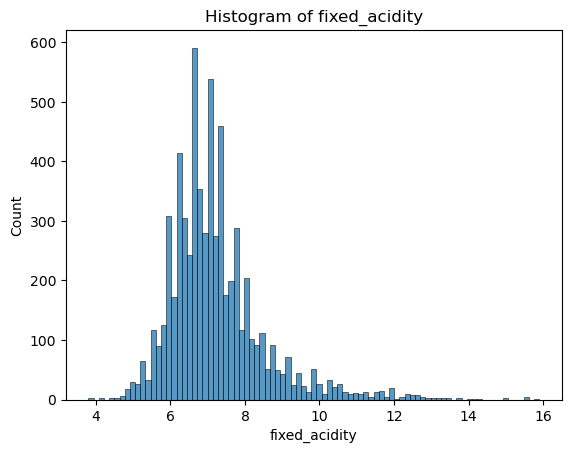

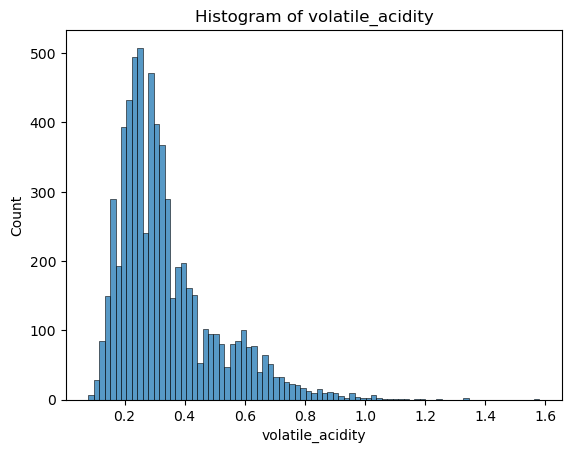

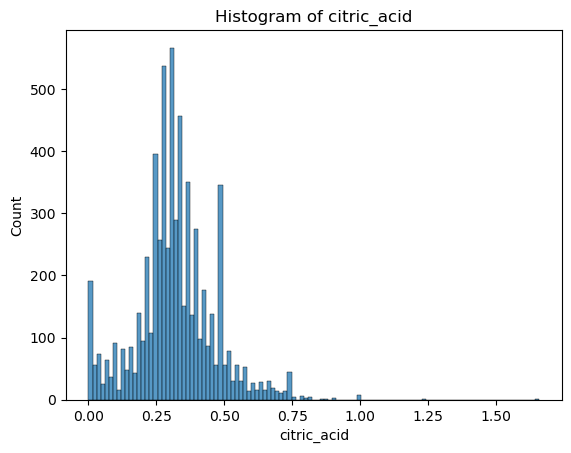

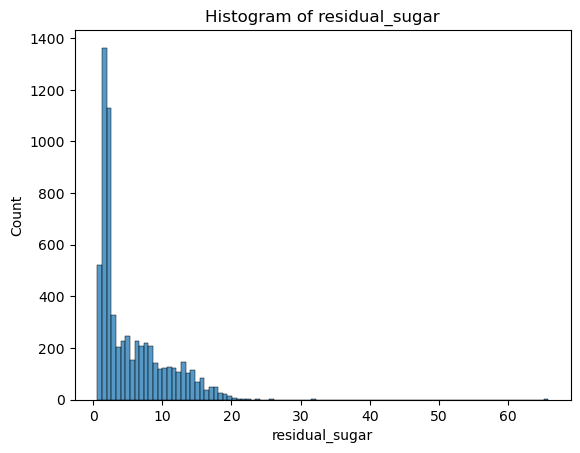

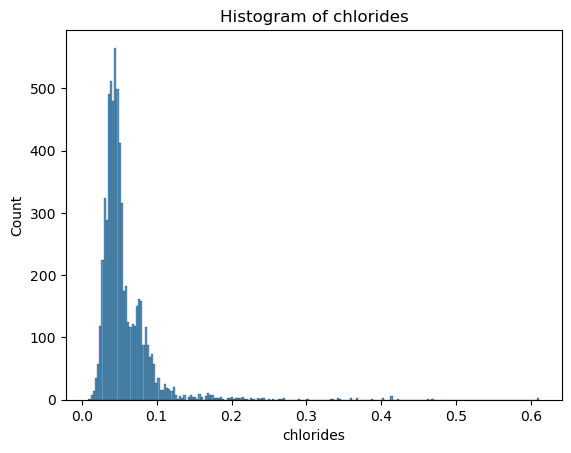

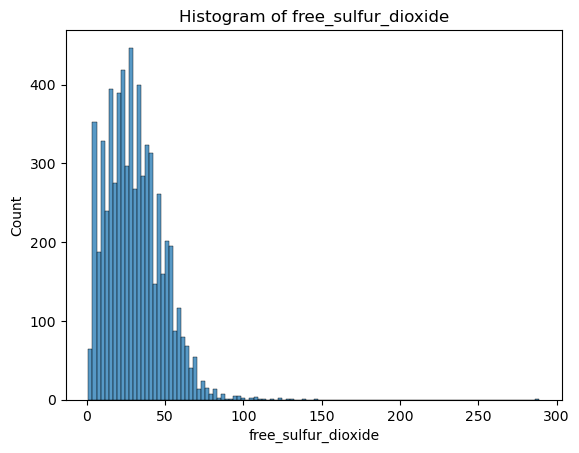

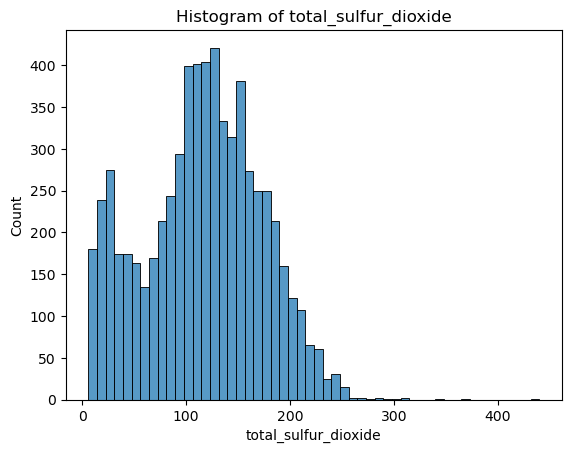

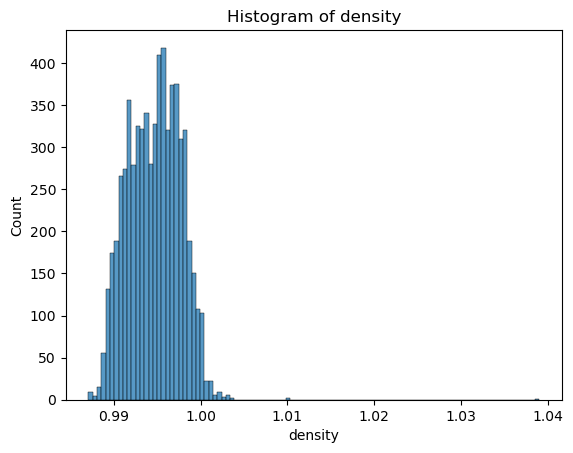

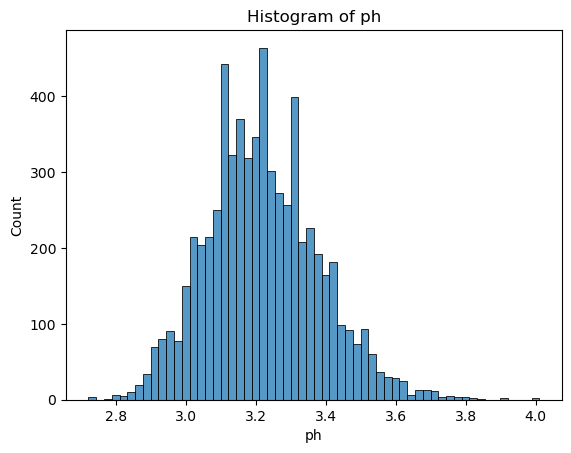

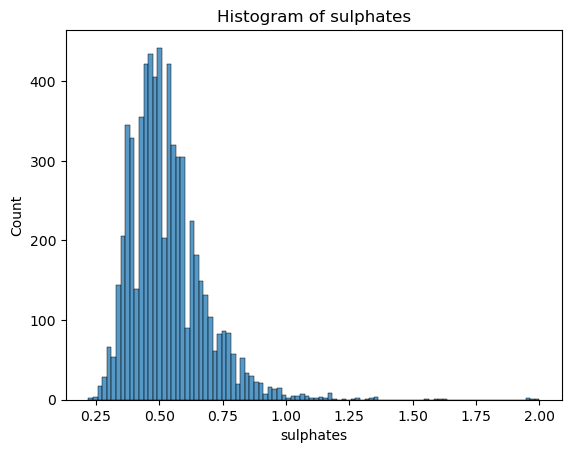

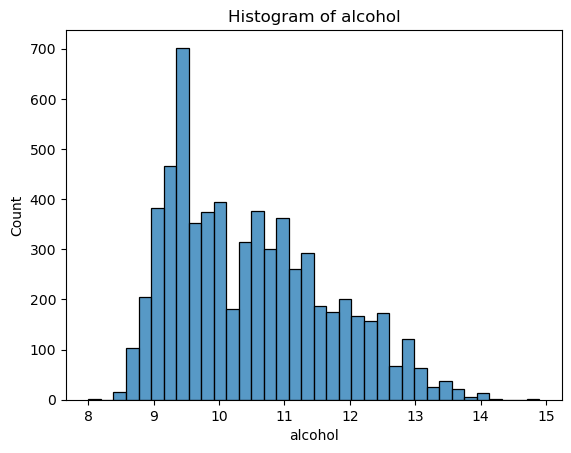

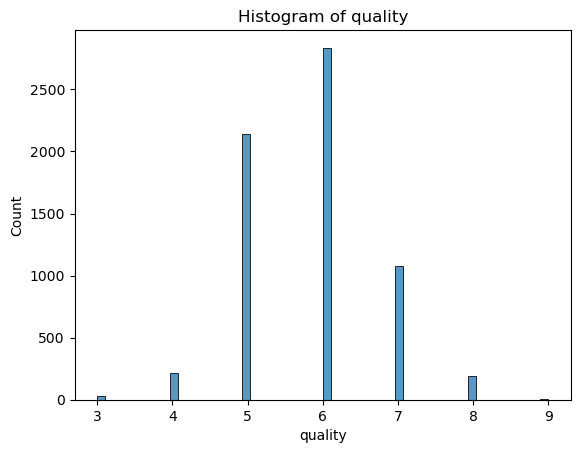

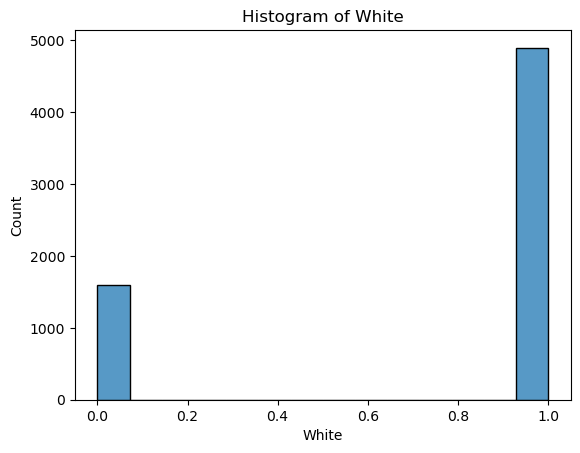

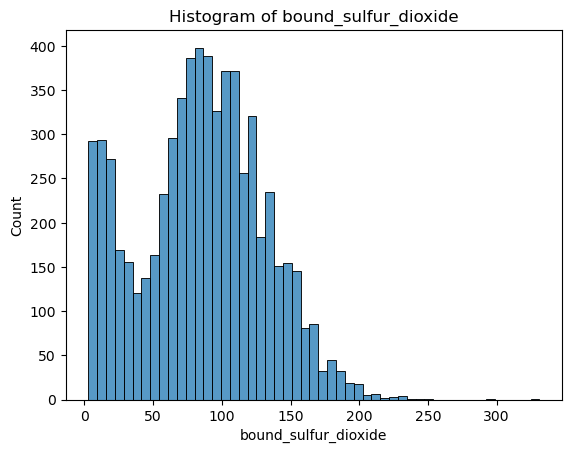

In [5]:
# use summarize function
p.summarize(df)

##### Takeaways:
- There are no null values in rows
- There are no null value in columns
- The data types make sense for what they are

In [6]:
# check it out
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  bound_sulfur_dioxide  
0      8.8        6  White      1                 125.0  
1      9.5        6  White      1                 118.0  
2     10.1        6  White      1                  67.0  
3      9.9        6  White      1                 139.0  
4      9.9        6  White      1                 139.0

In [7]:
# explore prior to outlier removal, I don't want to remove any outliers from this category
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

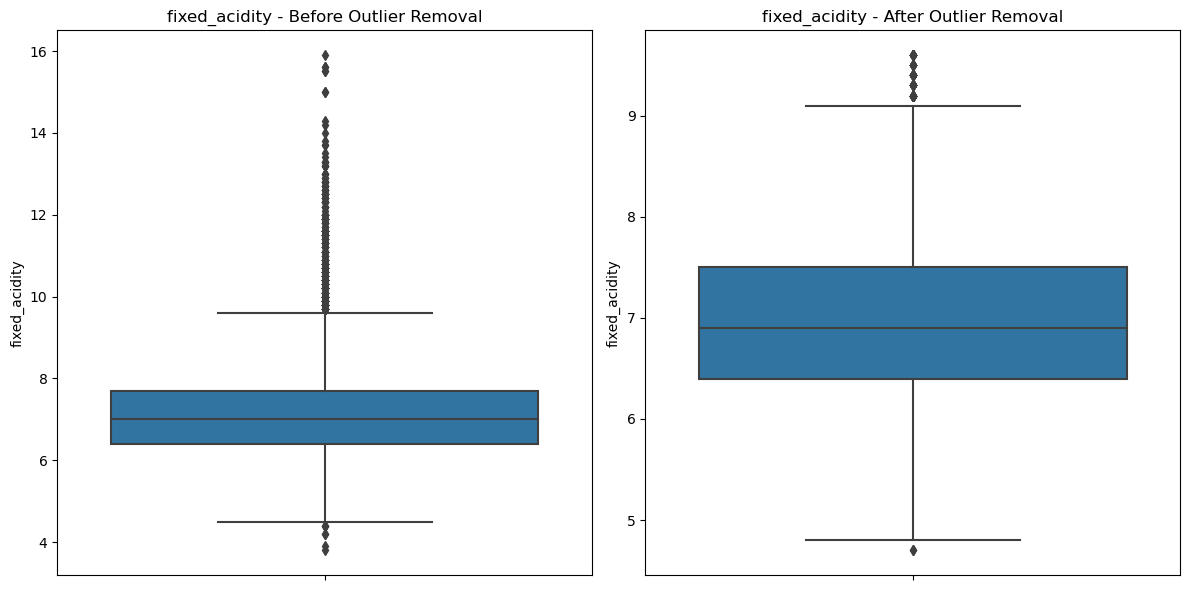

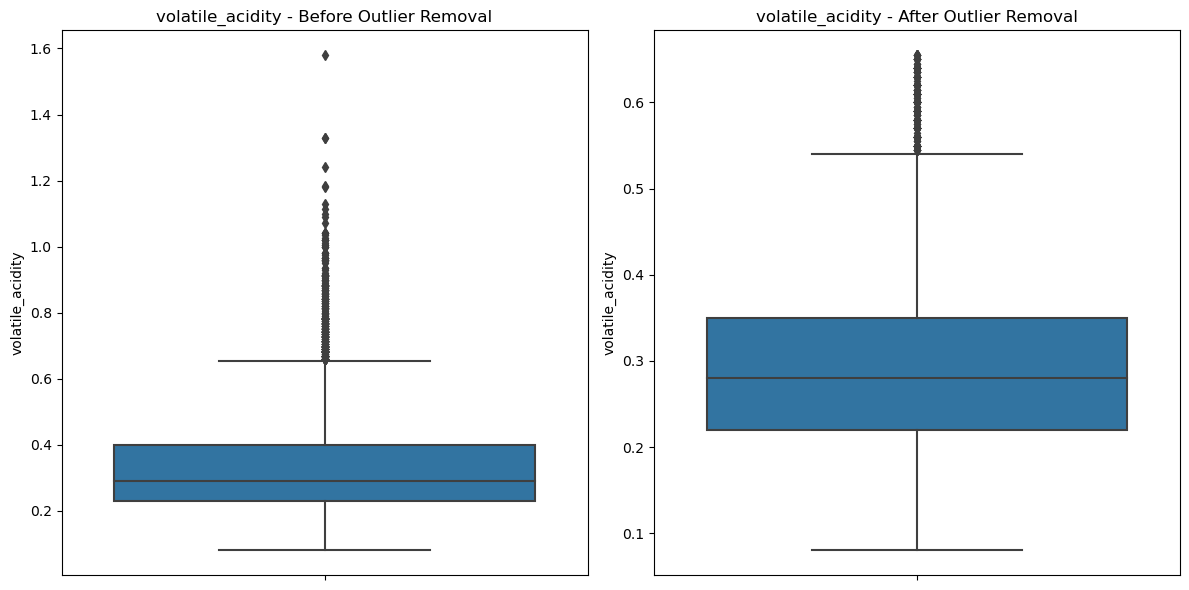

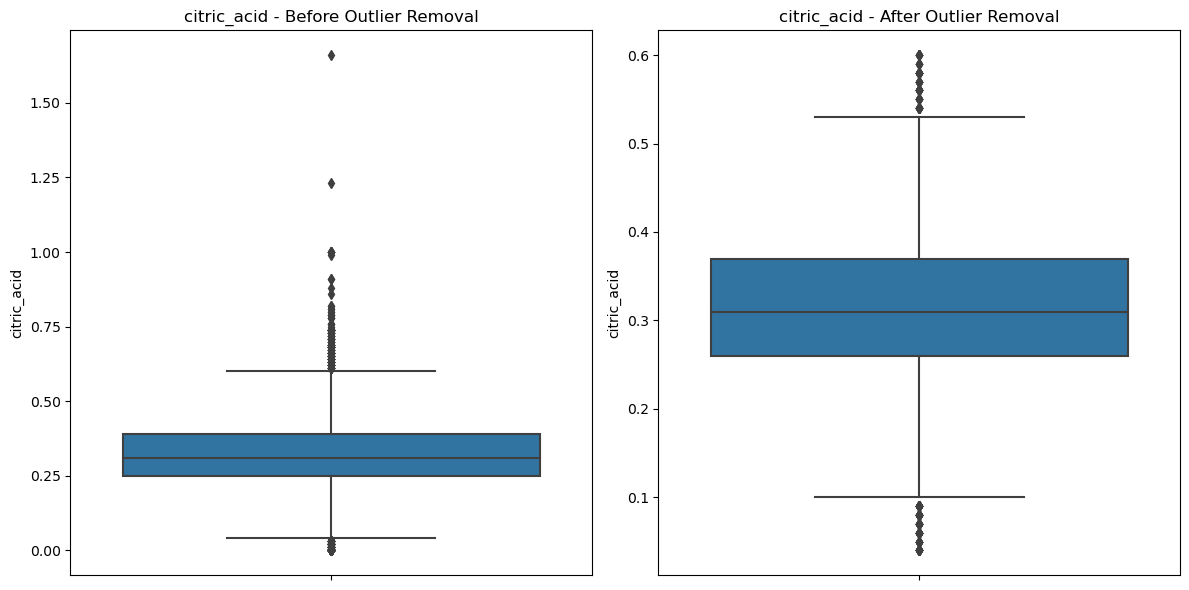

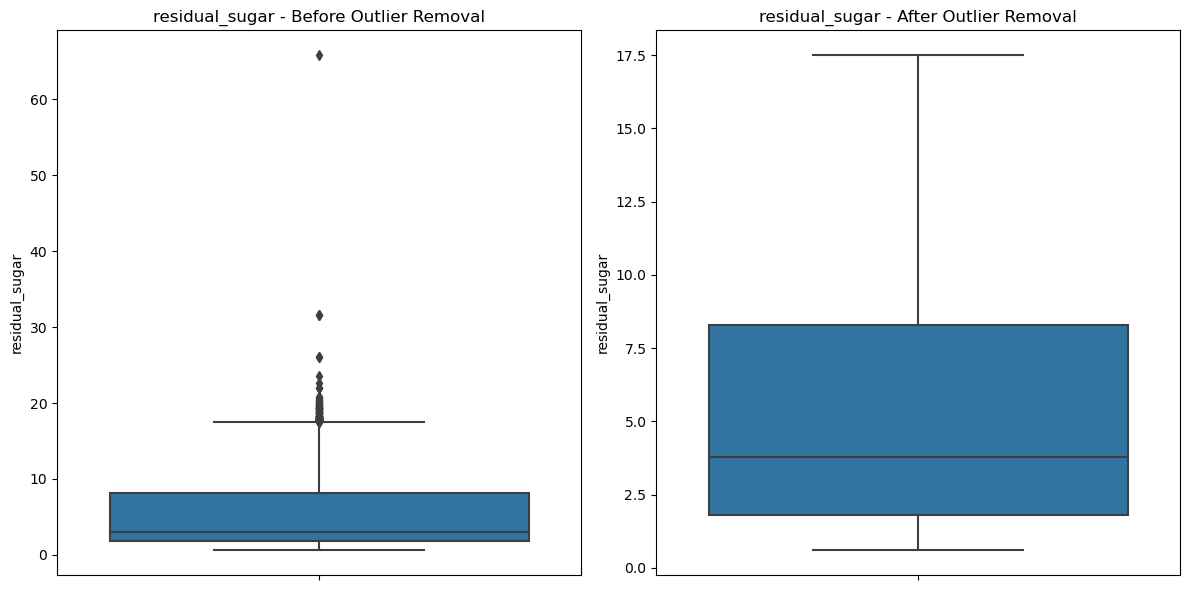

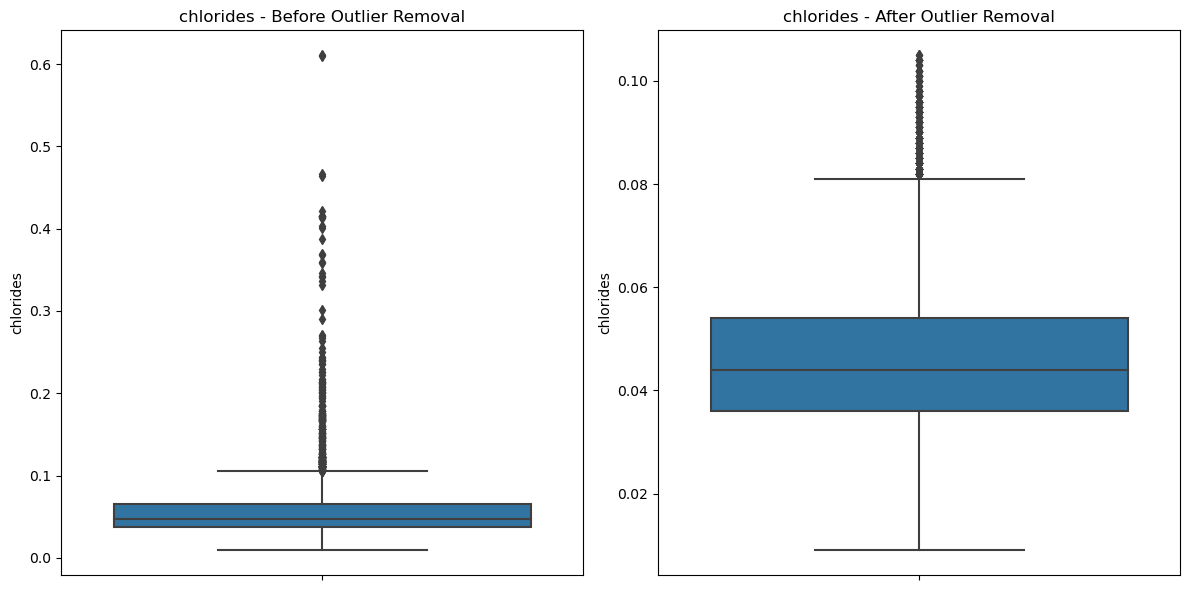

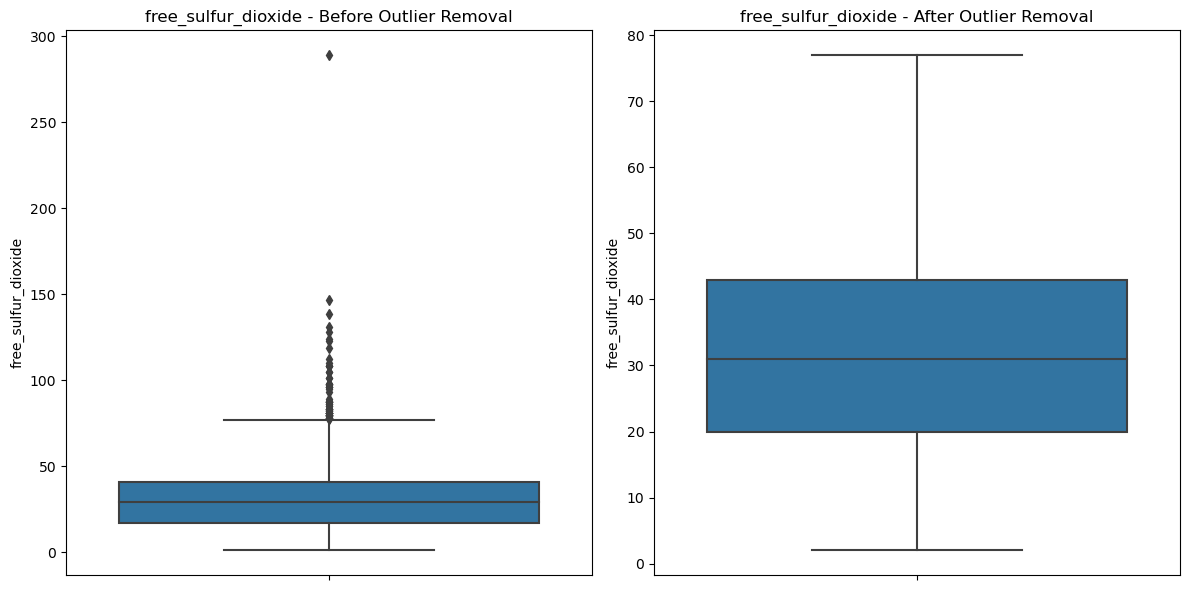

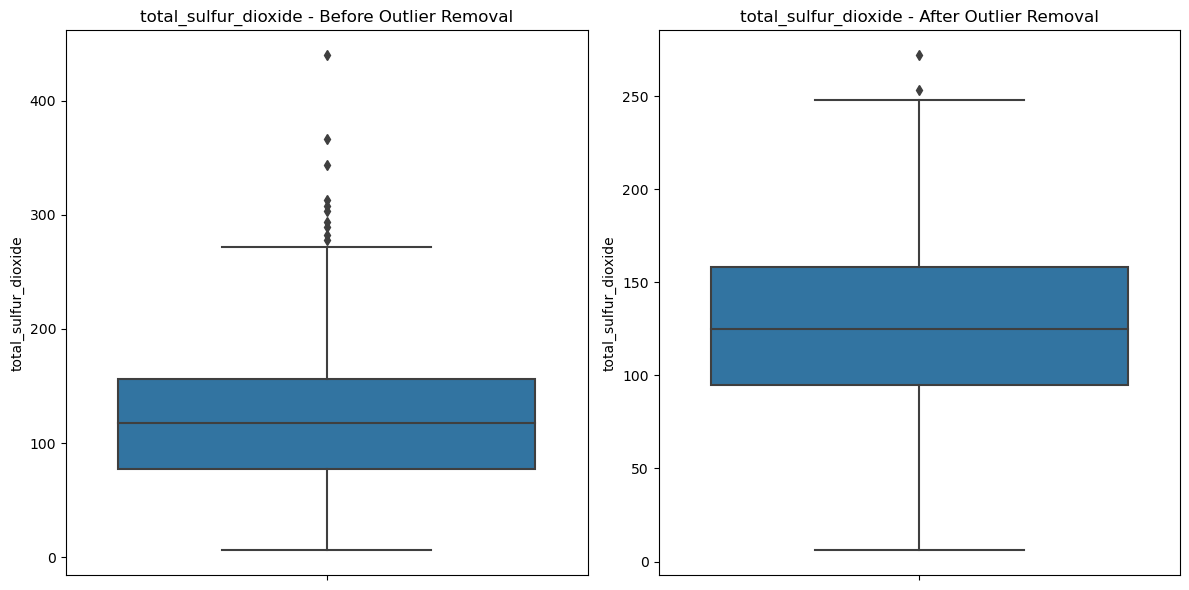

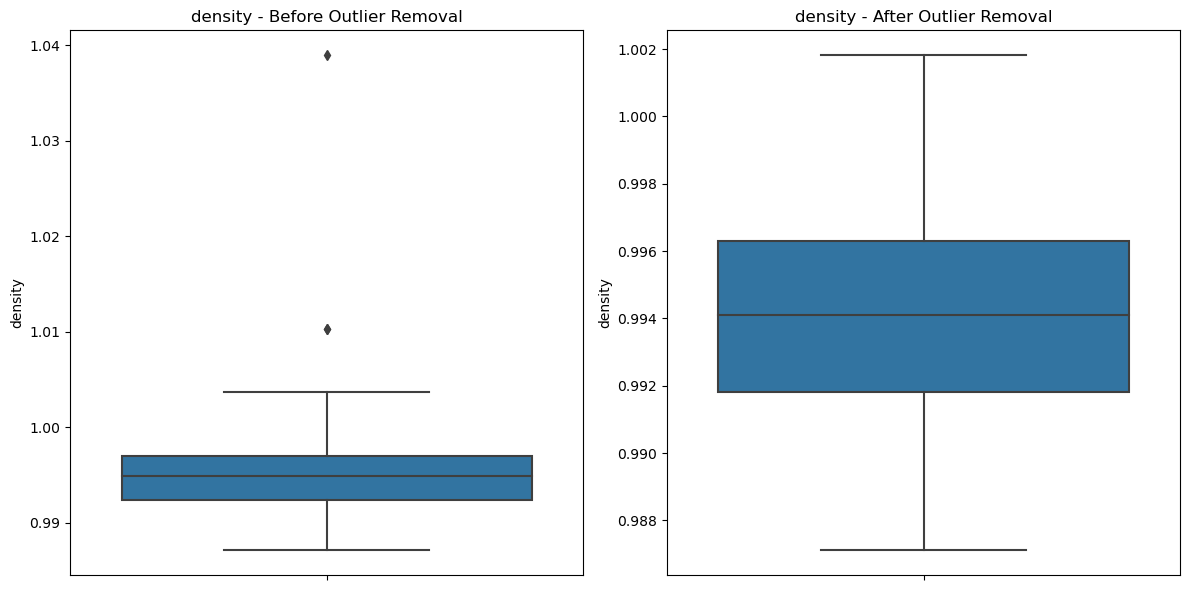

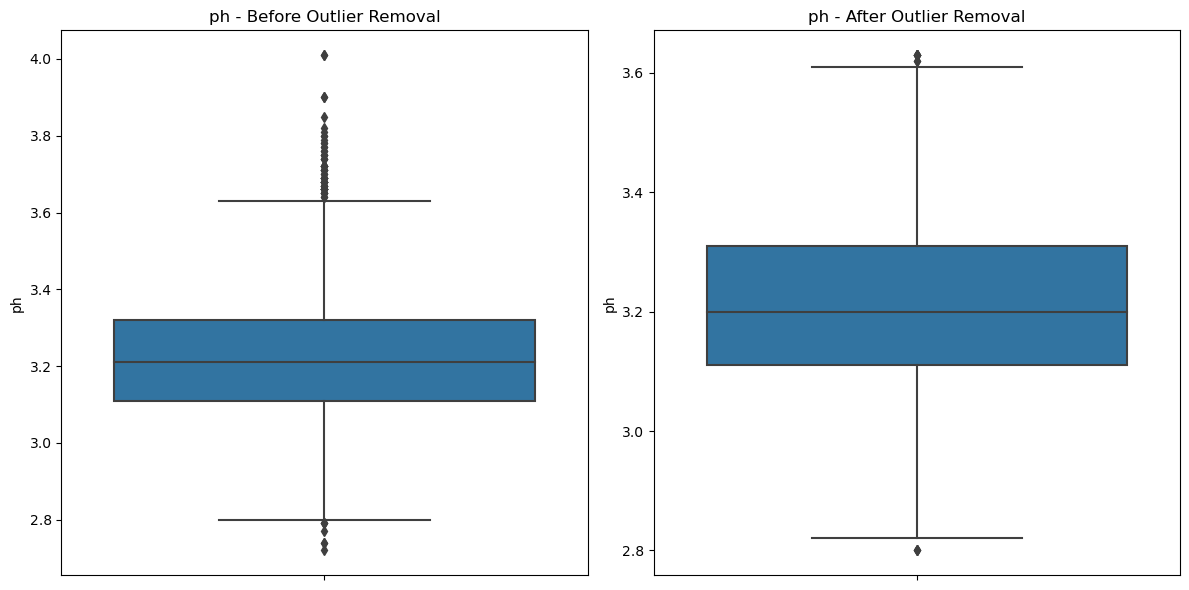

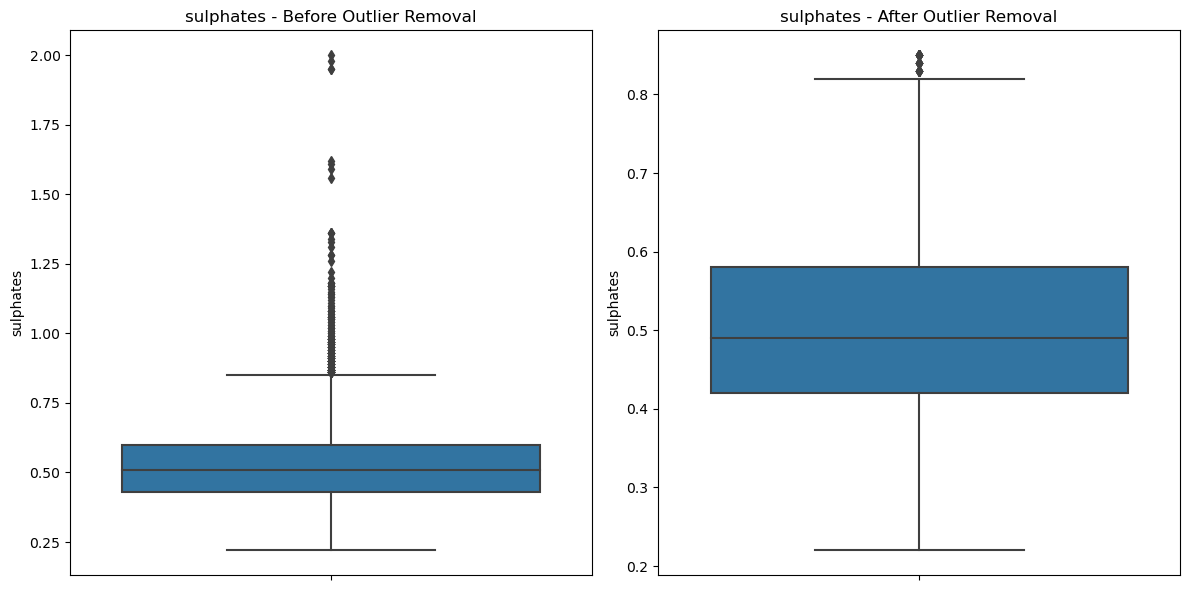

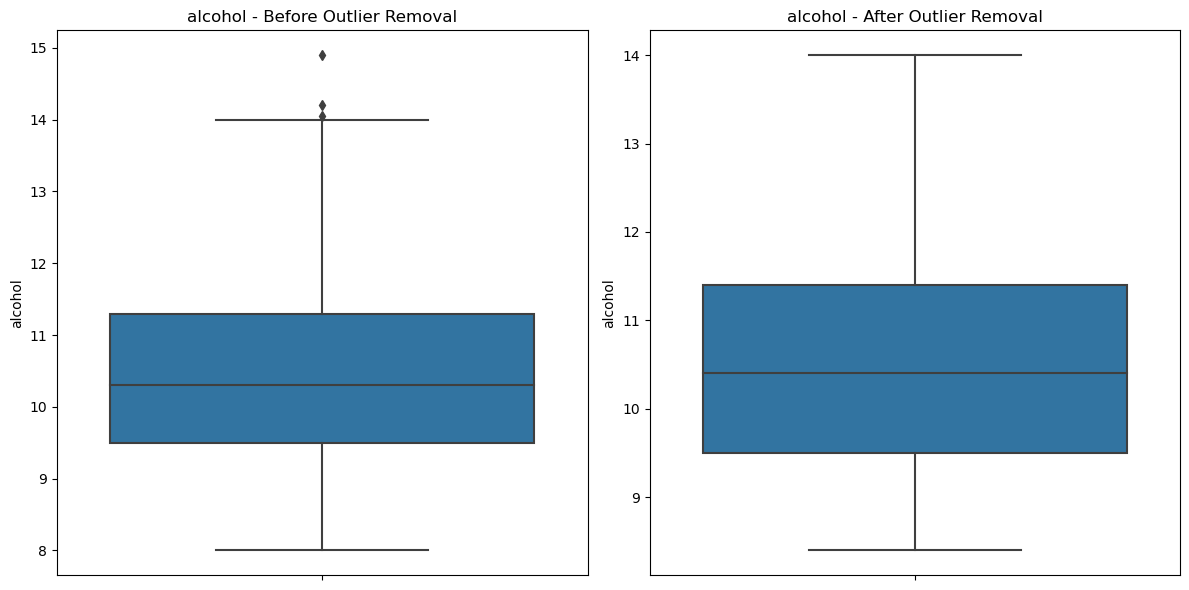

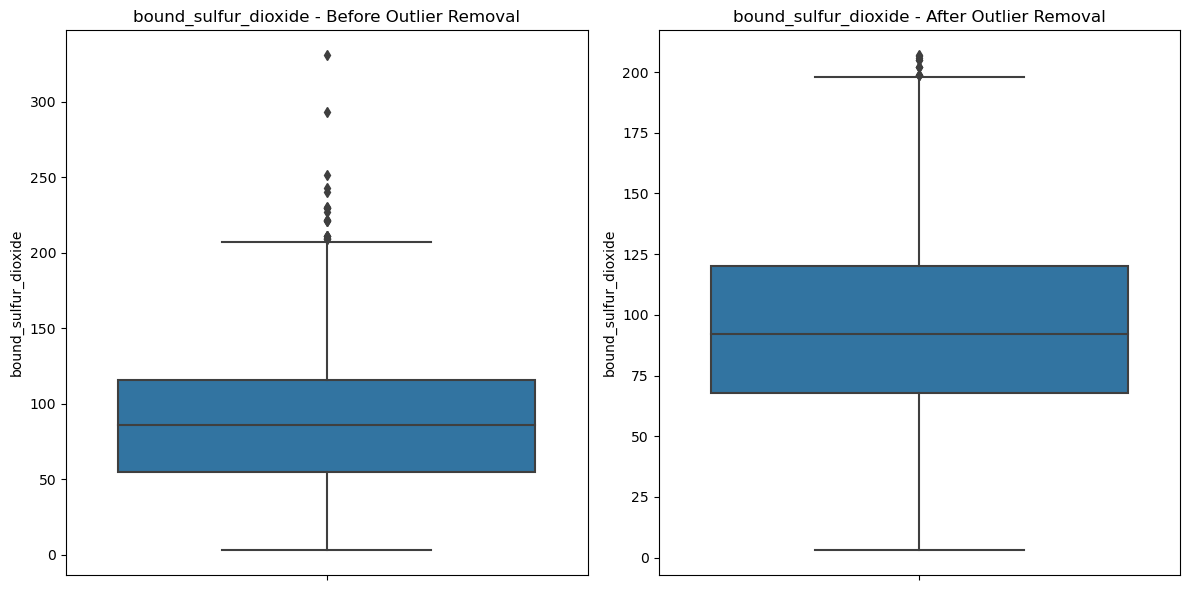

Column  Upper Bound  Lower Bound  Outliers Removed
0          fixed_acidity     9.650000     4.450000               357
1       volatile_acidity     0.655000    -0.025000               377
2            citric_acid     0.600000     0.040000               509
3         residual_sugar    17.550000    -7.650000               118
4              chlorides     0.105500    -0.002500               286
5    free_sulfur_dioxide    77.000000   -19.000000                62
6   total_sulfur_dioxide   274.500000   -41.500000                10
7                density     1.003965     0.985365                 3
8                     ph     3.635000     2.795000                73
9              sulphates     0.855000     0.175000               191
10               alcohol    14.000000     6.800000                 3
11  bound_sulfur_dioxide   207.500000   -36.500000                20

In [8]:
# remove outliers
df_clean, summary = w.remove_outliers(df, exclude_columns=['Type', 'quality','White'])
summary

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   Type  White  bound_sulfur_dioxide  
1      9.5        6  White      1                 118.0  
2     10.1        6  White      1                  67.0  
3      9.9        6  White      1                 139.0  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014

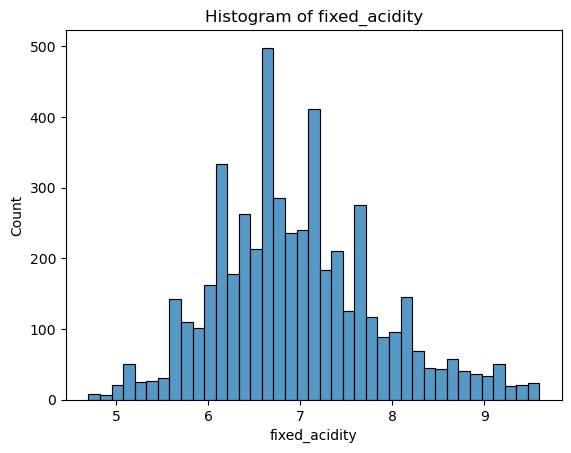

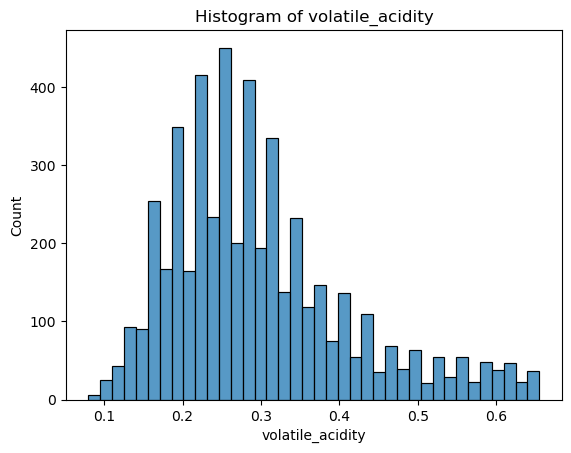

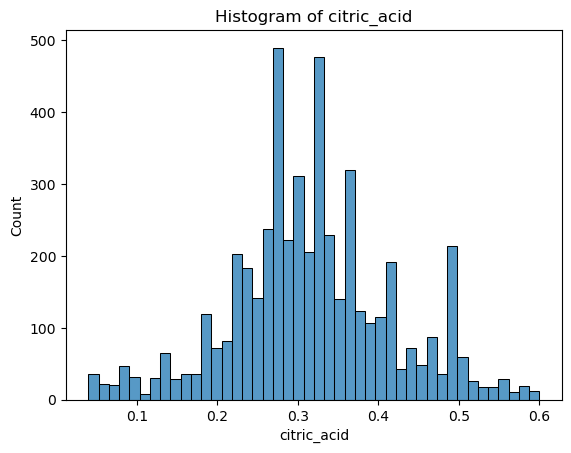

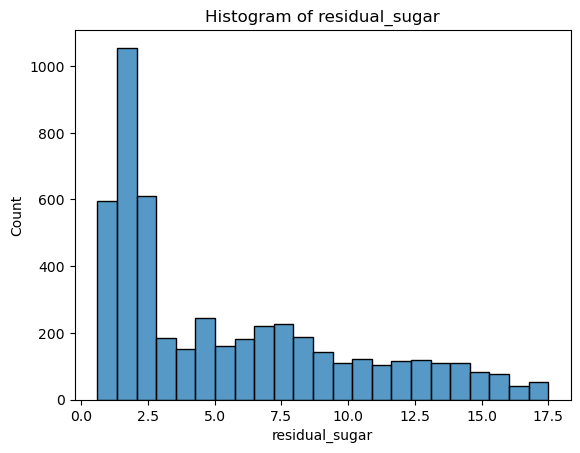

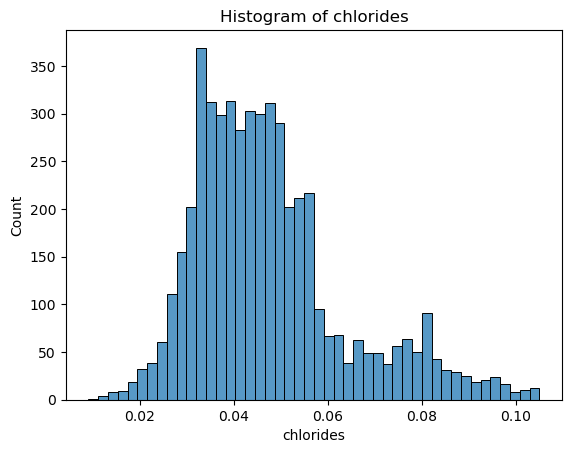

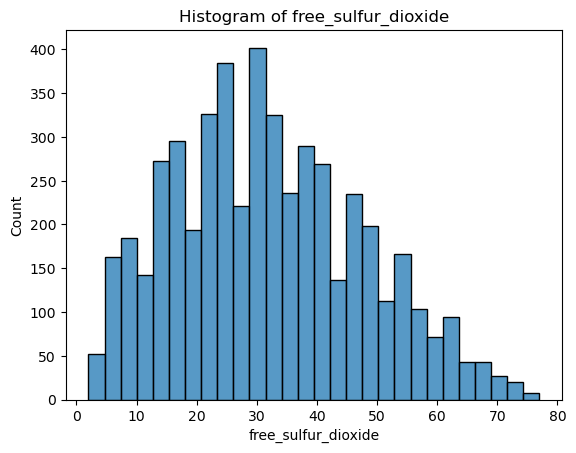

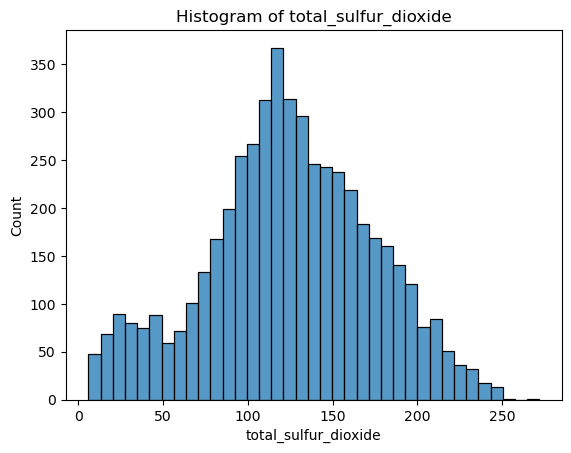

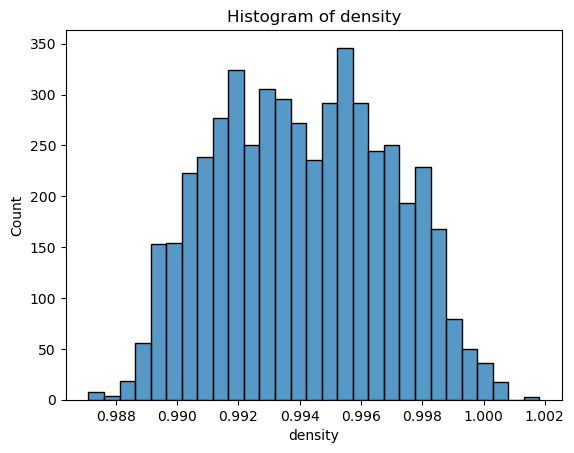

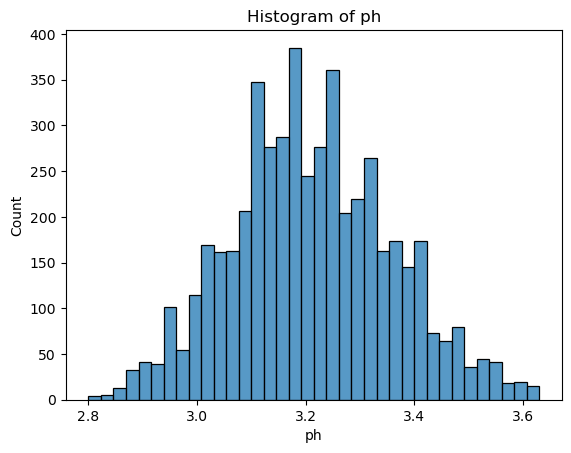

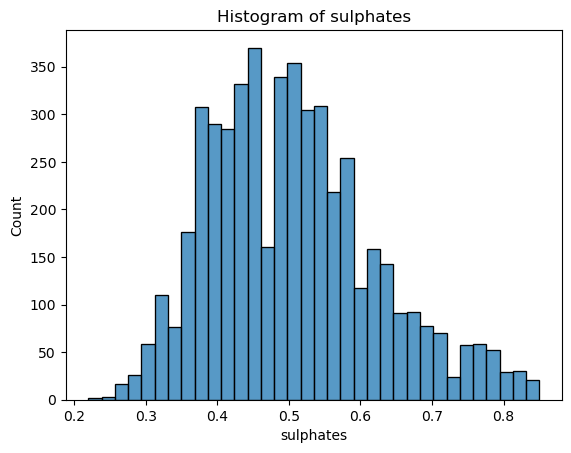

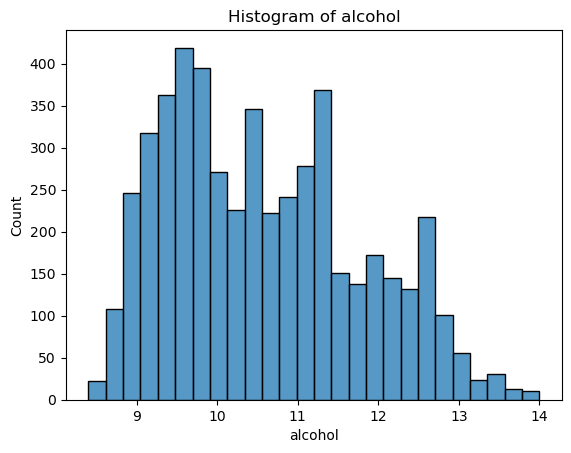

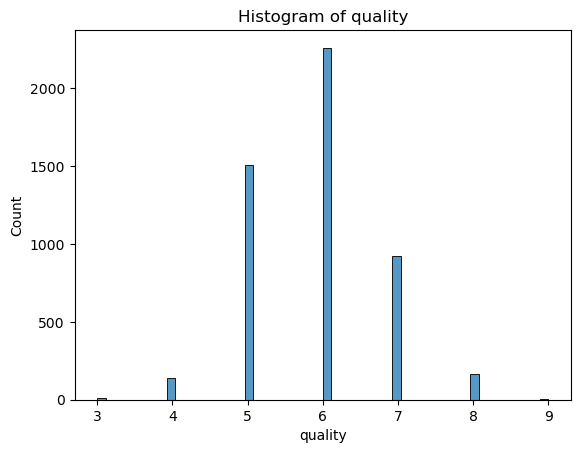

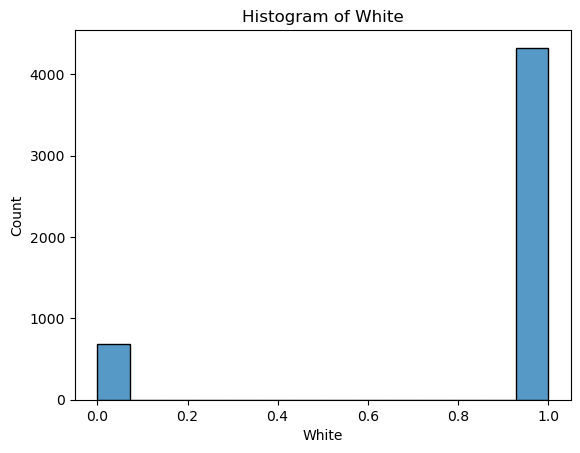

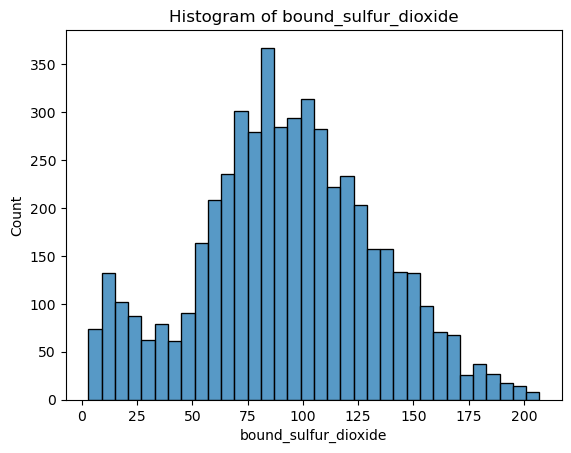

In [9]:
# summarize after outlier removal
# use summarize function
p.summarize2(df_clean)

In [10]:
# rename
df = df_clean

# Explore

 #### Big Question: What are the drivers of wine quality?

In [11]:
#split into train, validate and test
train, validate, test = p.split_data(df)
train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
12              7.9             0.180         0.37            1.20      0.040   
4343            5.8             0.220         0.25            1.50      0.024   
2416            7.0             0.160         0.26            6.85      0.047   
4684            6.0             0.240         0.34            1.00      0.036   
6383            7.0             0.655         0.16            2.10      0.074   
...             ...               ...          ...             ...        ...   
3614            6.4             0.380         0.24            7.20      0.047   
4586            5.4             0.290         0.38            1.20      0.029   
4200            8.0             0.240         0.33            1.20      0.044   
2073            6.6             0.270         0.29            5.30      0.045   
2759            7.7             0.180         0.35            5.80      0.055   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
12                   16.0                  75.0  0.99200  3.18       0.63   
4343                 21.0                 109.0  0.99234  3.37       0.58   
2416                 30.0                 220.0  0.99622  3.38       0.58   
4684                 52.0                 184.0  0.99097  3.44       0.44   
6383                  8.0                  25.0  0.99606  3.37       0.55   
...                   ...                   ...      ...   ...        ...   
3614                 41.0                 151.0  0.99604  3.11       0.60   
4586                 31.0                 132.0  0.98895  3.28       0.36   
4200                 28.0                 101.0  0.99035  3.03       0.43   
2073                 57.0                 189.0  0.99530  3.31       0.79   
2759                 25.0                 144.0  0.99576  3.24       0.54   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
12      10.80        5  White      1                  59.0  
4343    10.40        6  White      1                  88.0  
2416    10.10        6  White      1                 190.0  
4684    11.45        6  White      1                 132.0  
6383     9.70        5    Red      0                  17.0  
...       ...      ...    ...    ...                   ...  
3614     9.20        5  White      1                 110.0  
4586    12.40        6  White      1                 101.0  
4200    12.50        6  White      1                  73.0  
2073     9.80        5  White      1                 132.0  
2759    10.20        6  White      1                 119.0  

[3008 rows x 15 columns]

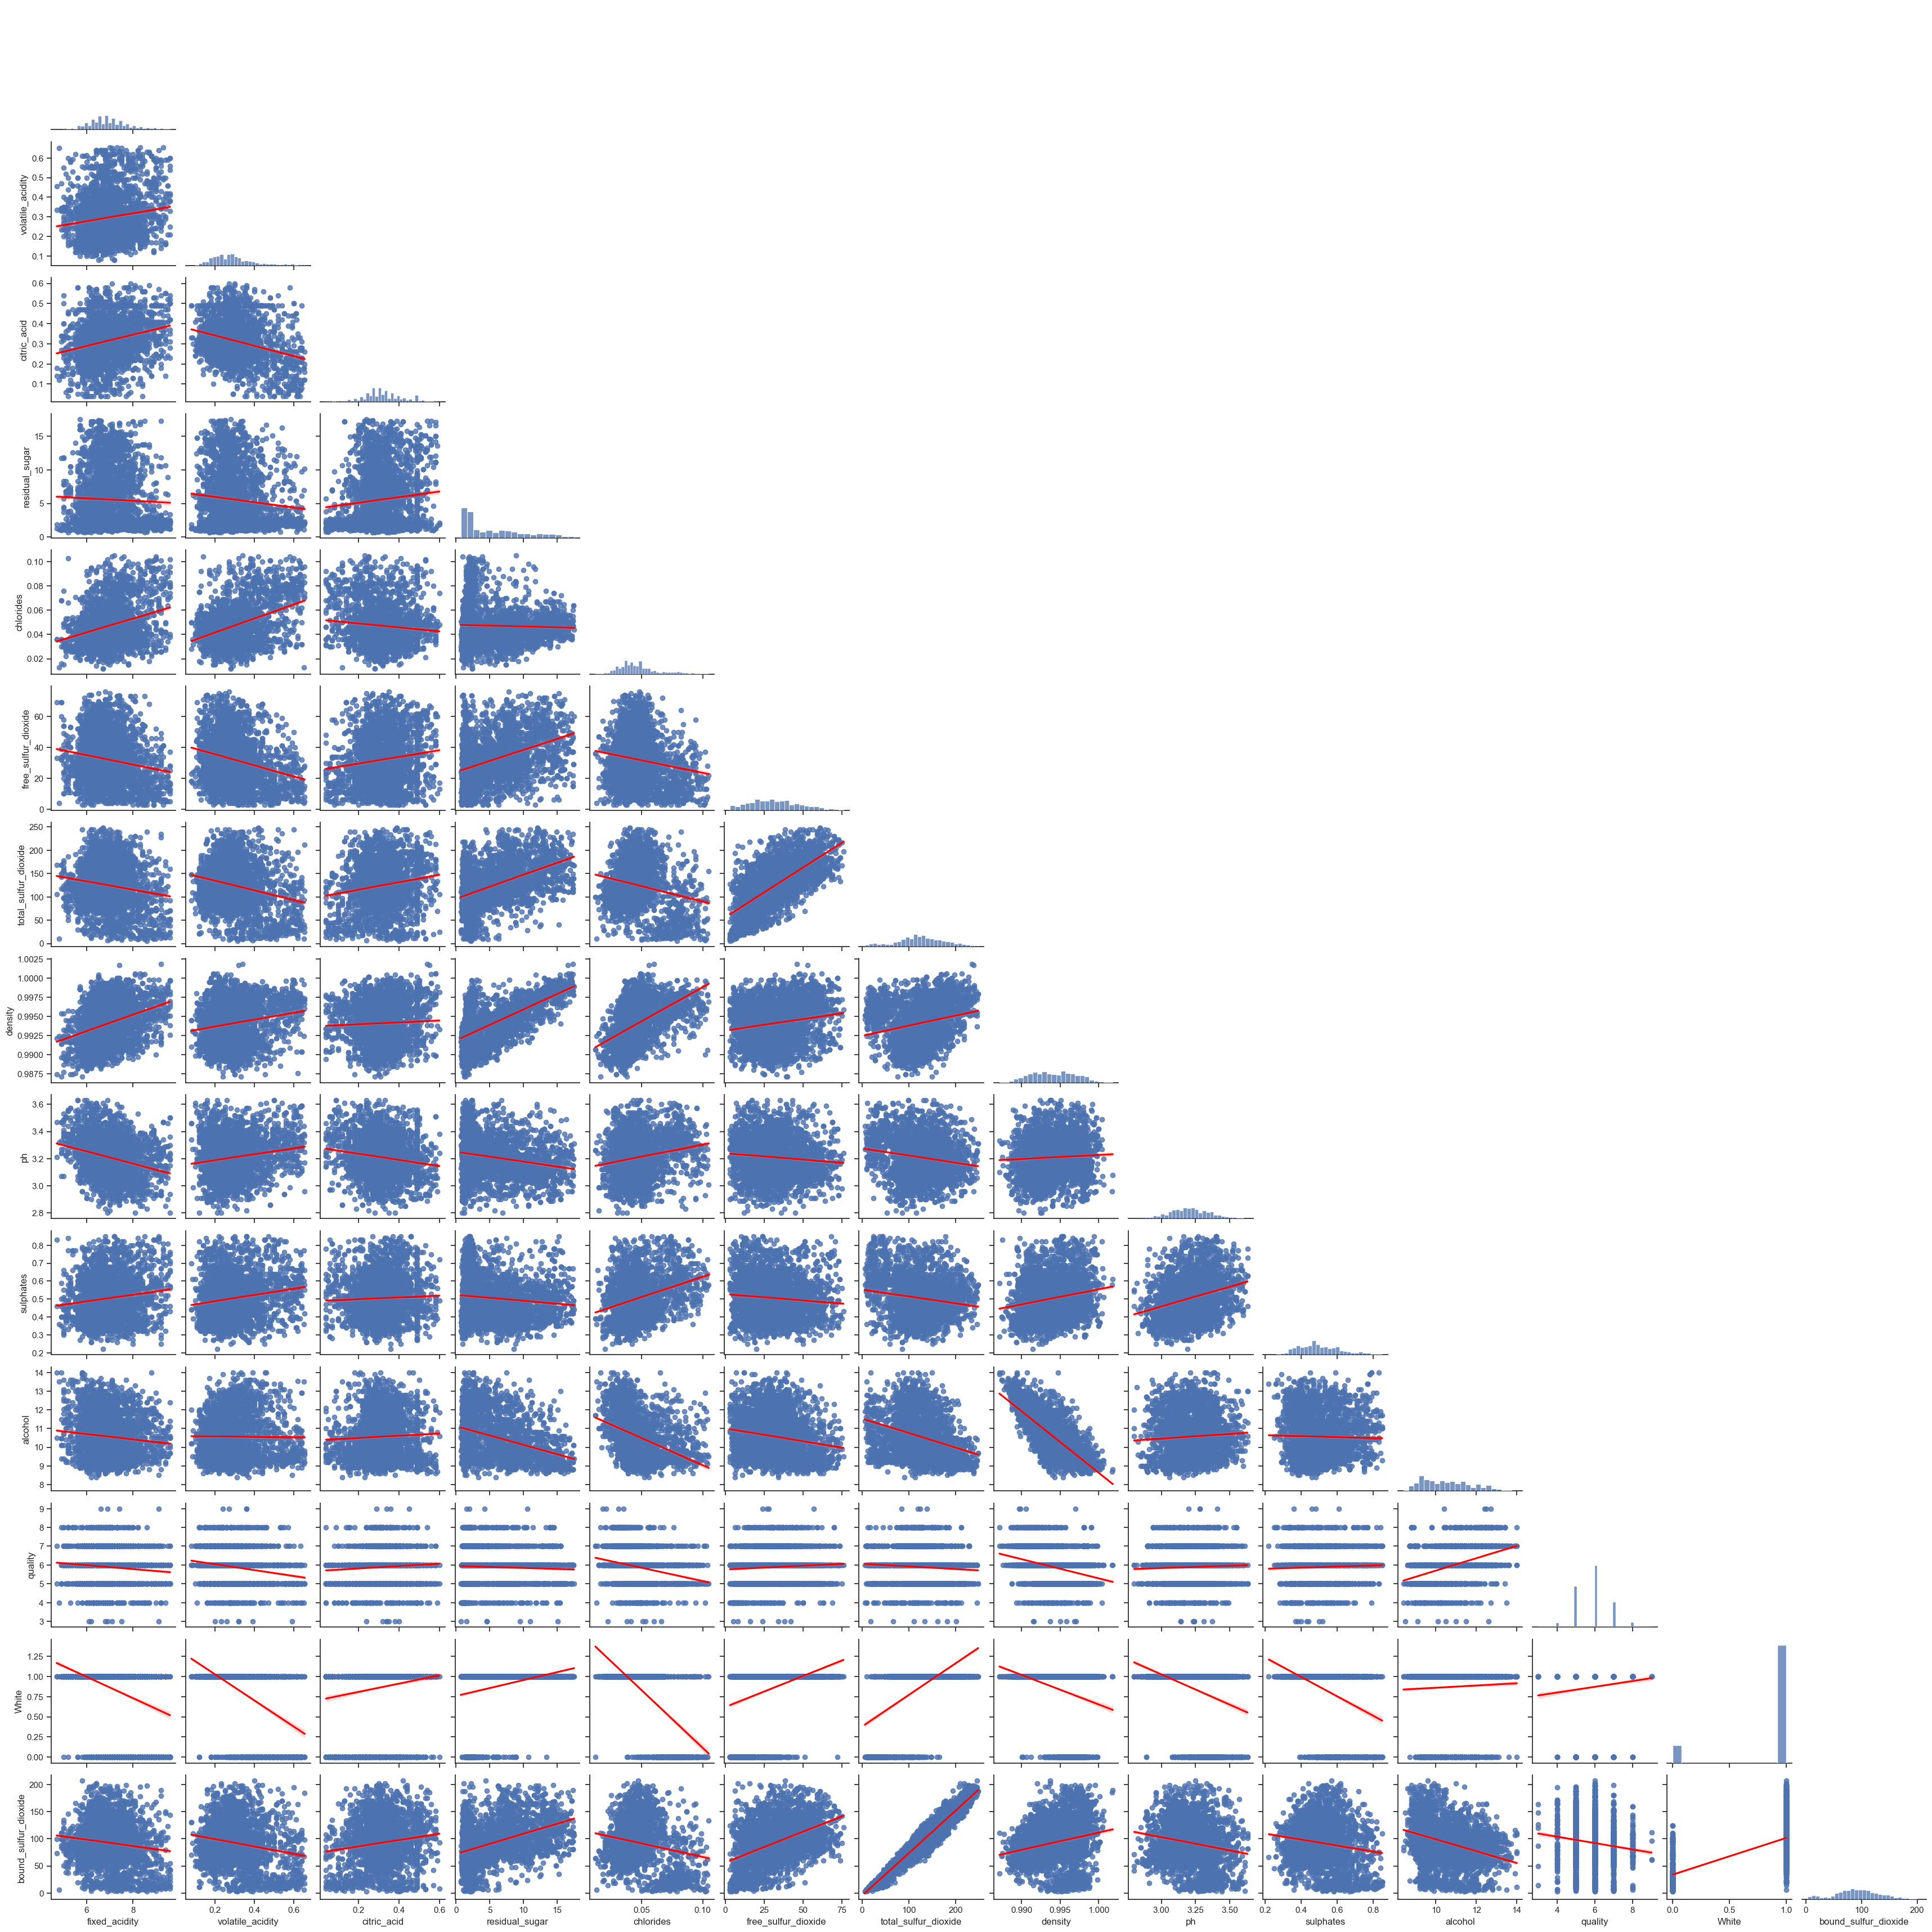

In [12]:
# View pairwise relationships
exp.plot_variable_pairs(train)

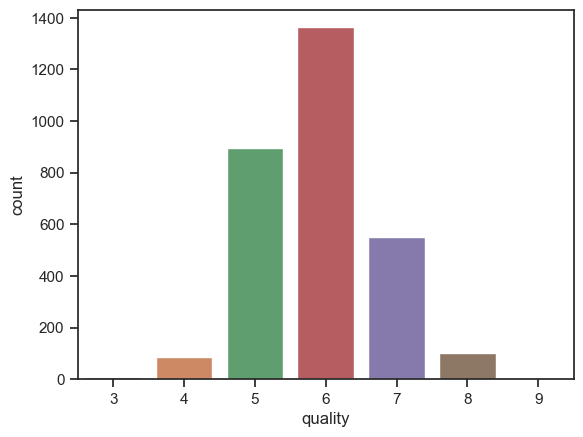

In [13]:
# View Target
sns.countplot(x=train.quality)
plt.show()

In [14]:
# check for normal distribution
tstat,pvalue = stats.shapiro(train.quality)
pvalue

8.407790785948902e-43

- appears to be a normal distribution
- makes sense that the lowest and highest quality ratings have the least amount of wines. exceptional few on both ends of the specturm.



In [15]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
12              7.9             0.180         0.37            1.20      0.040   
4343            5.8             0.220         0.25            1.50      0.024   
2416            7.0             0.160         0.26            6.85      0.047   
4684            6.0             0.240         0.34            1.00      0.036   
6383            7.0             0.655         0.16            2.10      0.074   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
12                   16.0                  75.0  0.99200  3.18       0.63   
4343                 21.0                 109.0  0.99234  3.37       0.58   
2416                 30.0                 220.0  0.99622  3.38       0.58   
4684                 52.0                 184.0  0.99097  3.44       0.44   
6383                  8.0                  25.0  0.99606  3.37       0.55   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
12      10.80        5  White      1                  59.0  
4343    10.40        6  White      1                  88.0  
2416    10.10        6  White      1                 190.0  
4684    11.45        6  White      1                 132.0  
6383     9.70        5    Red      0                  17.0

# Set parameters for stats test

In [16]:
alpha = 0.05

In [17]:
overall_mean = train.quality.mean()
overall_mean

5.89095744680851

# Quality (Categorical) vs. Fixed acidity(Continuous)

$H_{0}$ : there is not a relationship between wine quality and fixed acidity 

$H_{a}$ : there is a relationship between wine quality and fixed acidity

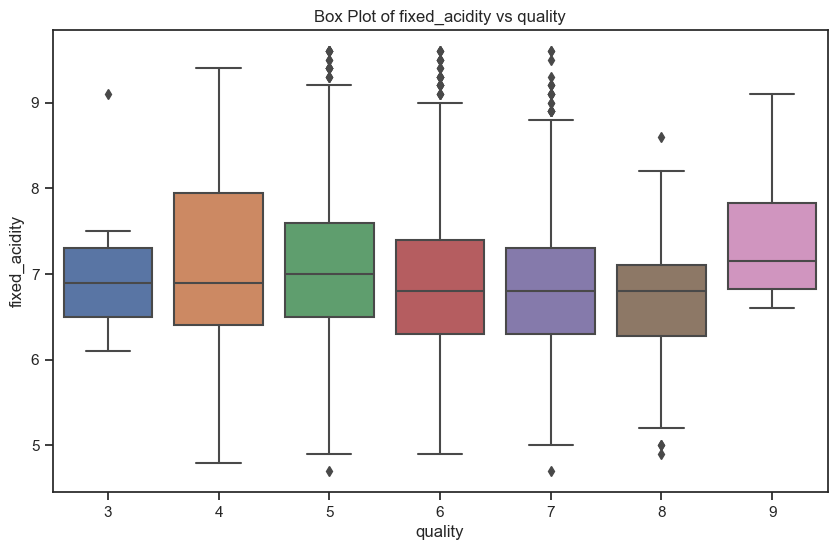

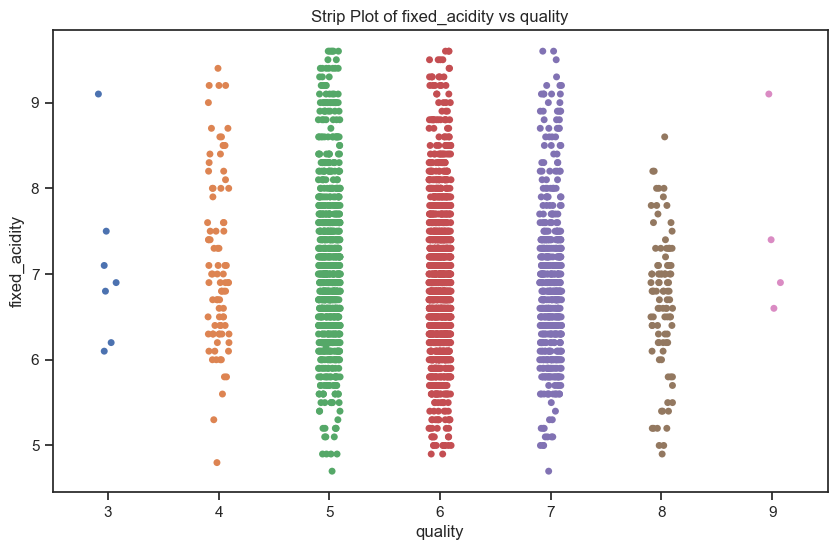

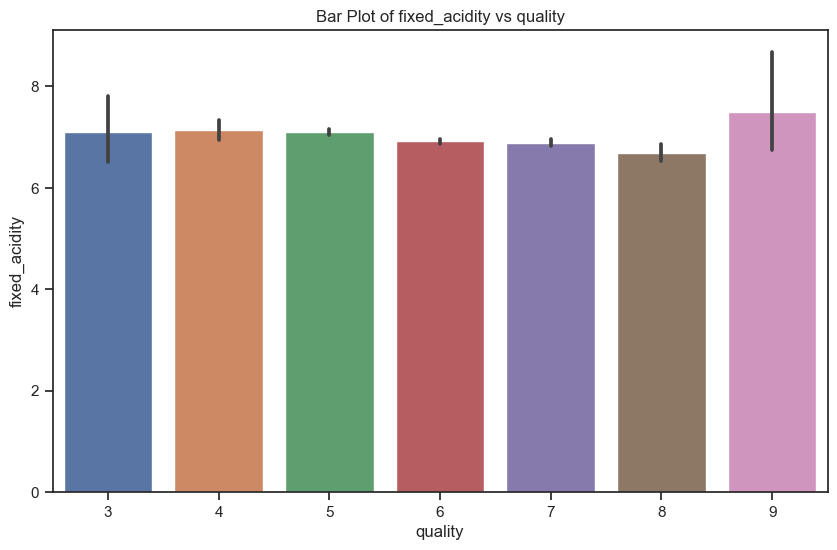

In [18]:
# quality vs. fixed_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality','fixed_acidity')

In [19]:
# check for normal distribution
stats.shapiro(train.fixed_acidity)

ShapiroResult(statistic=0.9820119738578796, pvalue=4.259931557787105e-19)

In [20]:
# stats test
tstat, pval = stats.ttest_1samp(train.fixed_acidity, overall_mean)
tstat, pval

(66.57144489180777, 0.0)

In [21]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Volatile Acidity(Continuous)

$H_{0}$ : there is not a relationship between wine quality and volatile acidity 

$H_{a}$ : there is a relationship between wine quality and volatile acidity

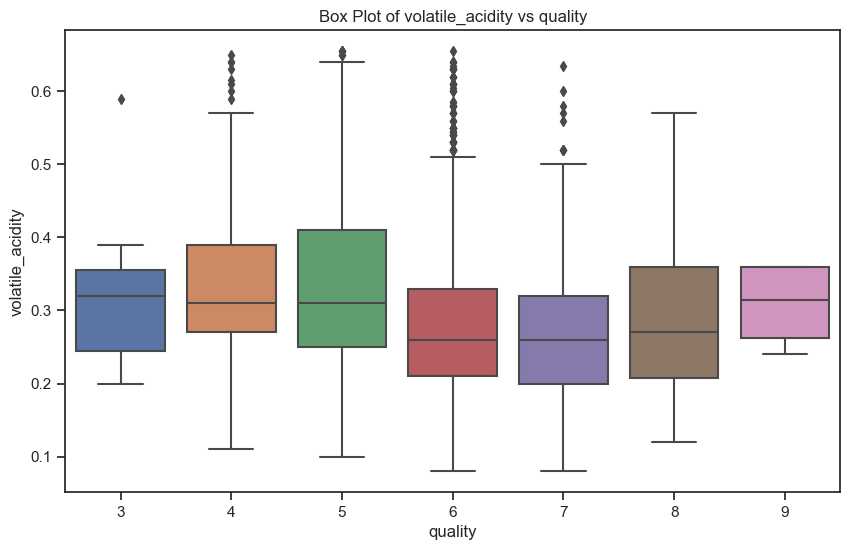

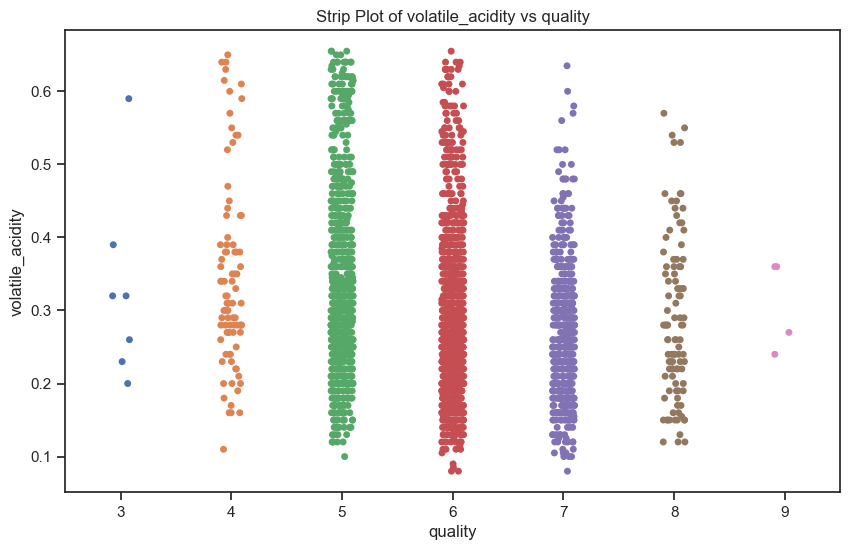

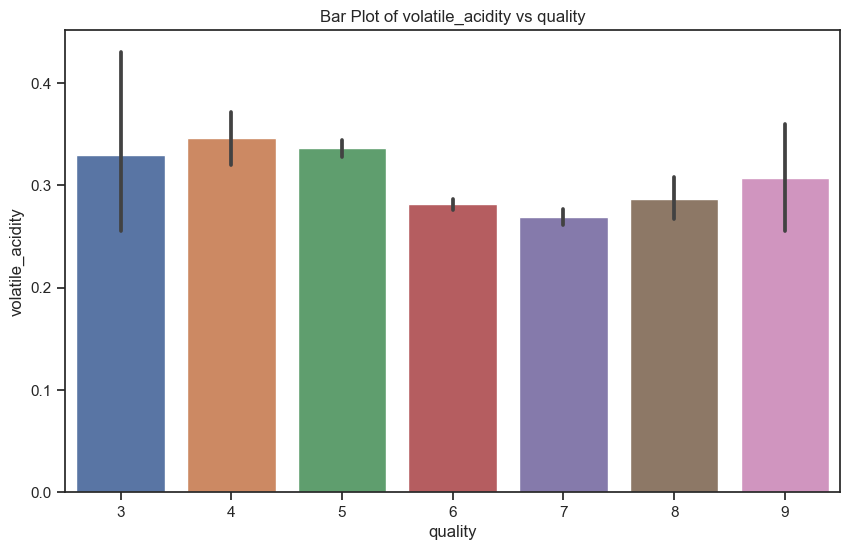

In [22]:
# quality vs. volatile_acidity
exp.plot_categorical_and_continuous_vars(train, 'quality', 'volatile_acidity')

In [23]:
# check for normal distribution
stats.shapiro(train.volatile_acidity)

ShapiroResult(statistic=0.9292975664138794, pvalue=1.5660094444871312e-35)

In [24]:
# stats test
tstat, pval = stats.ttest_1samp(train.volatile_acidity, overall_mean)
tstat, pval

(-2693.7646147297005, 0.0)

In [25]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Citric Acid (Continuous)

$H_{0}$ : there is not a relationship between wine quality and citric acid 

$H_{a}$ : there is a relationship between wine quality and citric acid

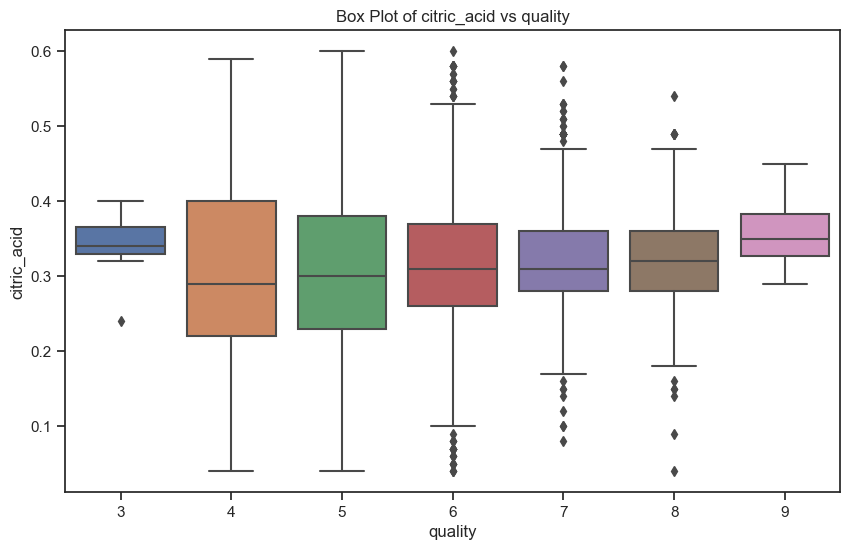

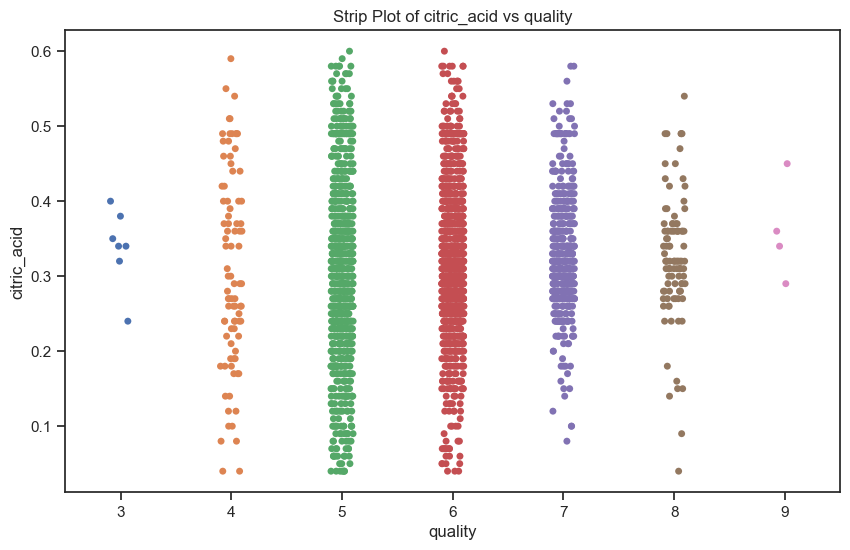

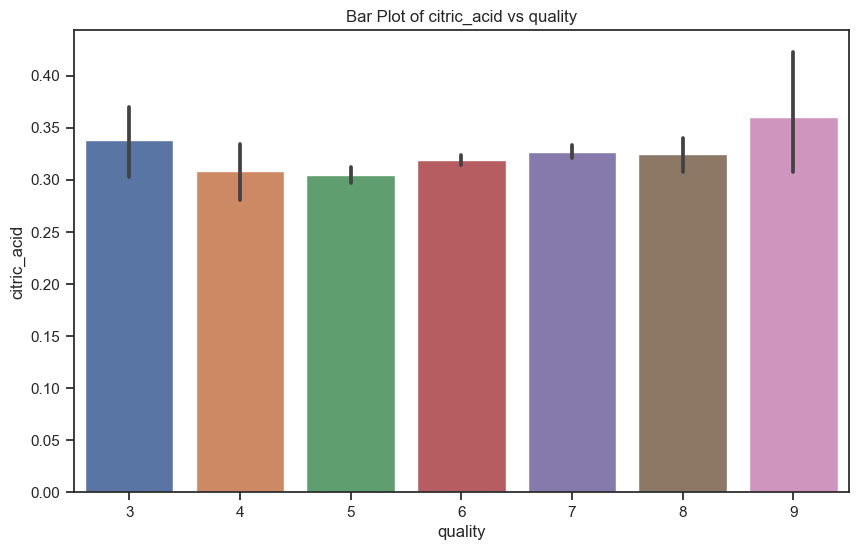

In [26]:
# quality vs. citric_acid
exp.plot_categorical_and_continuous_vars(train, 'quality', 'citric_acid')

In [27]:
# check for normal distribution
stats.shapiro(train.citric_acid)

ShapiroResult(statistic=0.9869310259819031, pvalue=4.931871570003029e-16)

In [28]:
# stats test
tstat, pval = stats.ttest_1samp(train.citric_acid, overall_mean)
tstat, pval

(-3058.1770244552063, 0.0)

In [29]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Residual sugar (Continuous)

$H_{0}$ : there is not a relationship between wine quality and residual sugar

$H_{a}$ : there is a relationship between wine quality and residual sugar

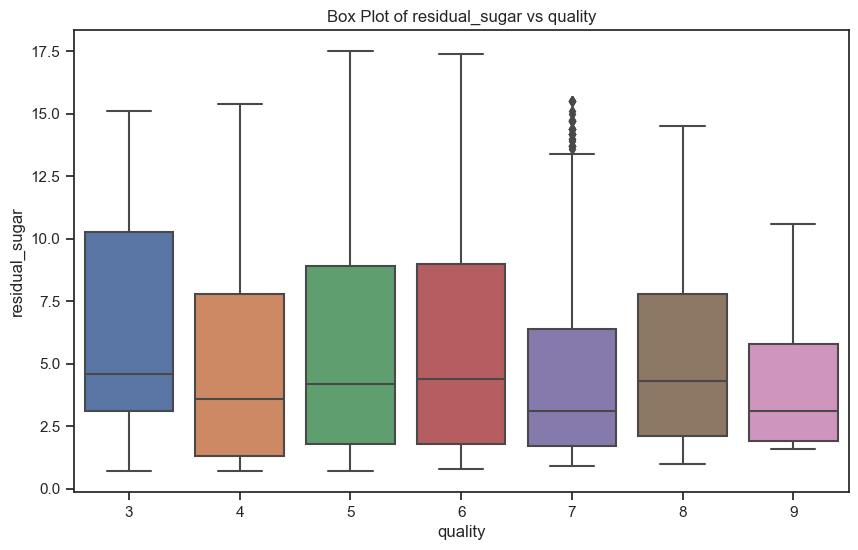

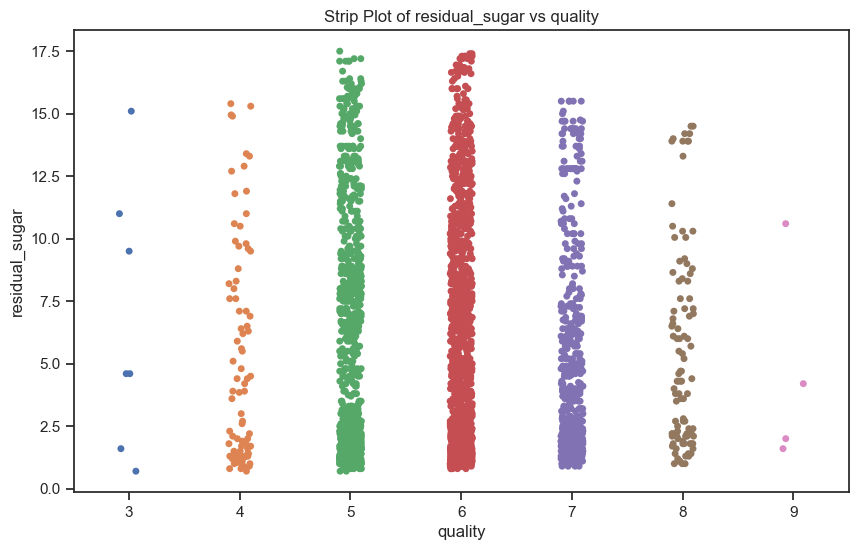

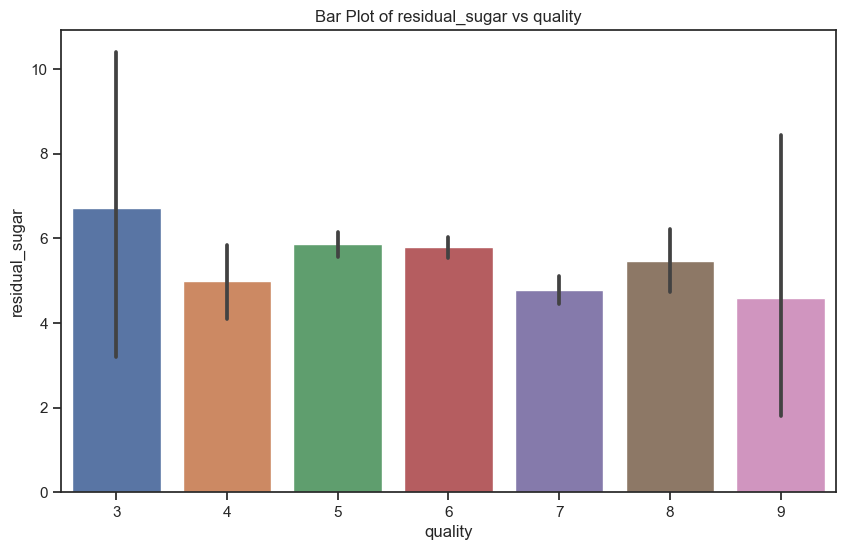

In [30]:
# quality vs. residual_sugar
exp.plot_categorical_and_continuous_vars(train, 'quality', 'residual_sugar')

In [31]:
# check for normal distribution
stats.shapiro(train.residual_sugar)

ShapiroResult(statistic=0.8652395009994507, pvalue=4.203895392974451e-45)

In [32]:
# stats test
tstat, pval = stats.ttest_1samp(train.residual_sugar, overall_mean)
tstat, pval

(-3.6600109187225467, 0.00025654044261575197)

In [33]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Chlorides (Continuous)

$H_{0}$ : there is not a relationship between wine quality and chlorides

$H_{a}$ : there is a relationship between wine quality and chlorides

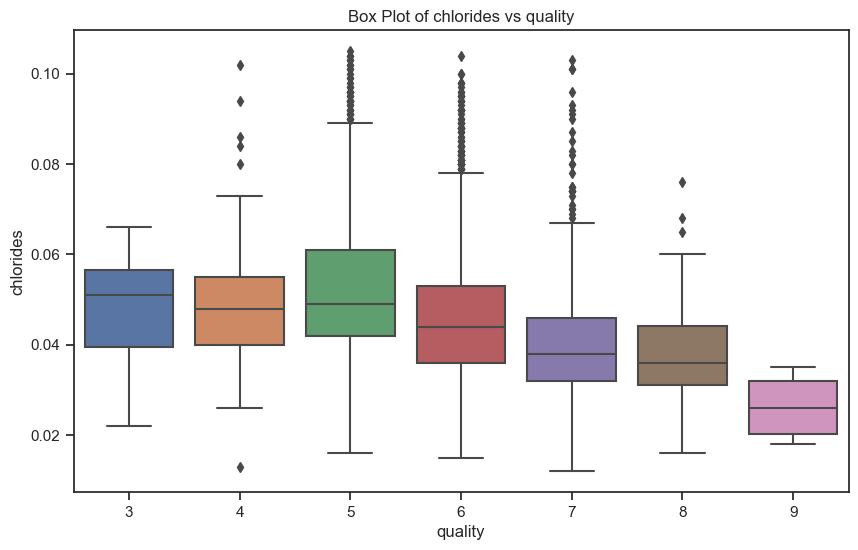

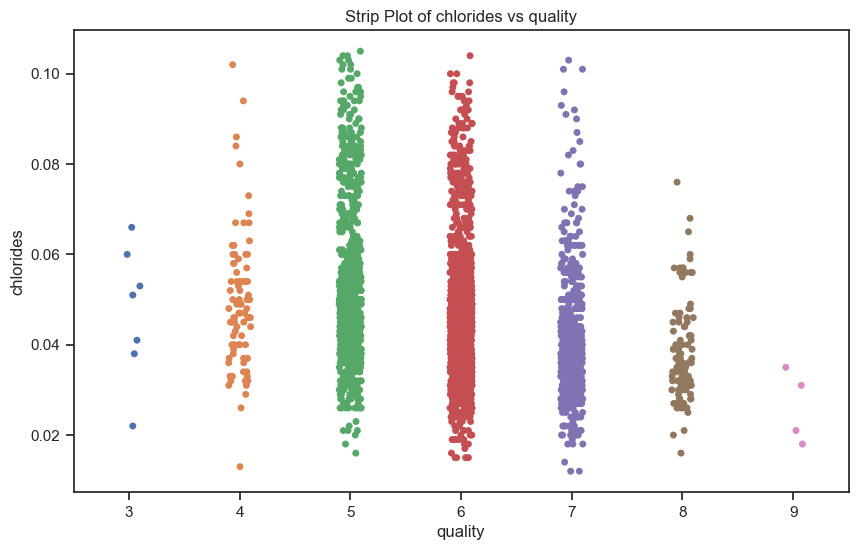

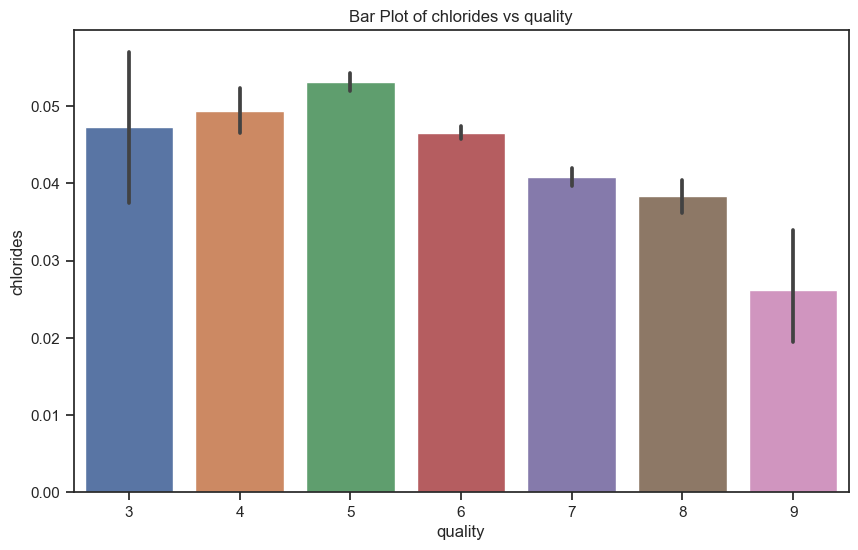

In [34]:
# quality vs. chlorides
exp.plot_categorical_and_continuous_vars(train, 'quality', 'chlorides')

In [35]:
# check for normal distribution
stats.shapiro(train.chlorides)

ShapiroResult(statistic=0.9269747734069824, pvalue=5.516687397877004e-36)

In [36]:
# stats test
tstat, pval = stats.ttest_1samp(train.chlorides, overall_mean)
tstat, pval

(-19714.978714042416, 0.0)

In [37]:
if ((pval /2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Free Sulfur Dioxide (Continuous)

$H_{0}$ : there is not a relationship between wine quality and Free Sulfur Dioxide

$H_{a}$ : there is a relationship between wine quality and Free Sulfur Dioxide

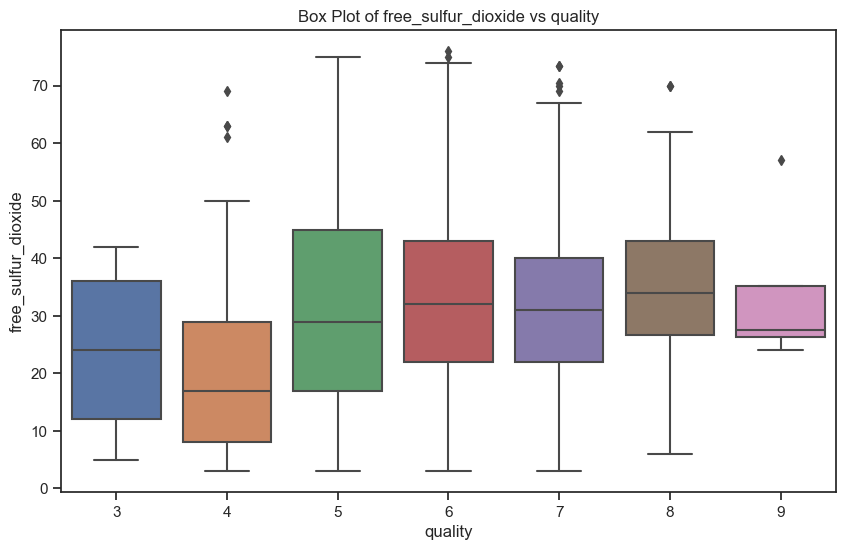

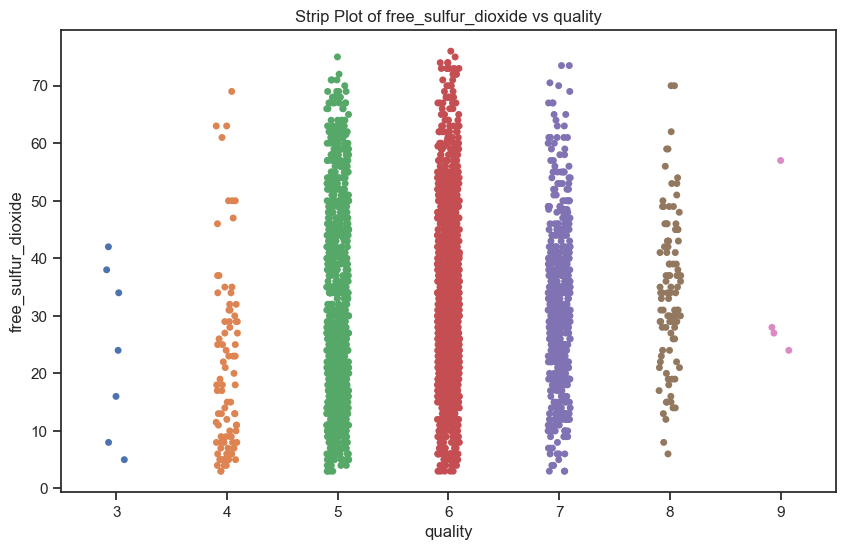

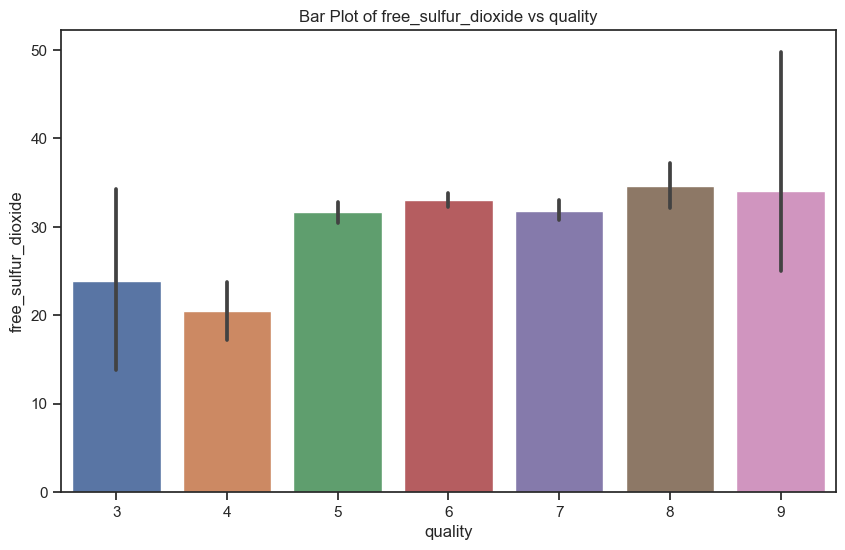

In [38]:
# quality vs. free_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'free_sulfur_dioxide')

In [39]:
# check for normal distribution
stats.shapiro(train.free_sulfur_dioxide)

ShapiroResult(statistic=0.981089174747467, pvalue=1.3280921109467312e-19)

In [40]:
# stats test
tstat, pval = stats.ttest_1samp(train.free_sulfur_dioxide, overall_mean)
tstat, pval

(91.33644364314708, 0.0)

In [41]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Total Sulfur Dioxide (Continuous)

$H_{0}$ : there is not a relationship between wine quality and total sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and total sulfur dioxide

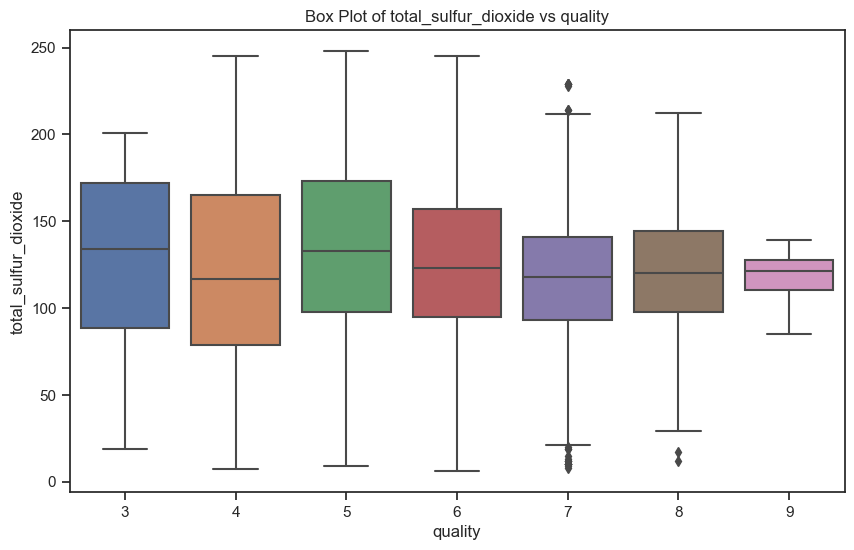

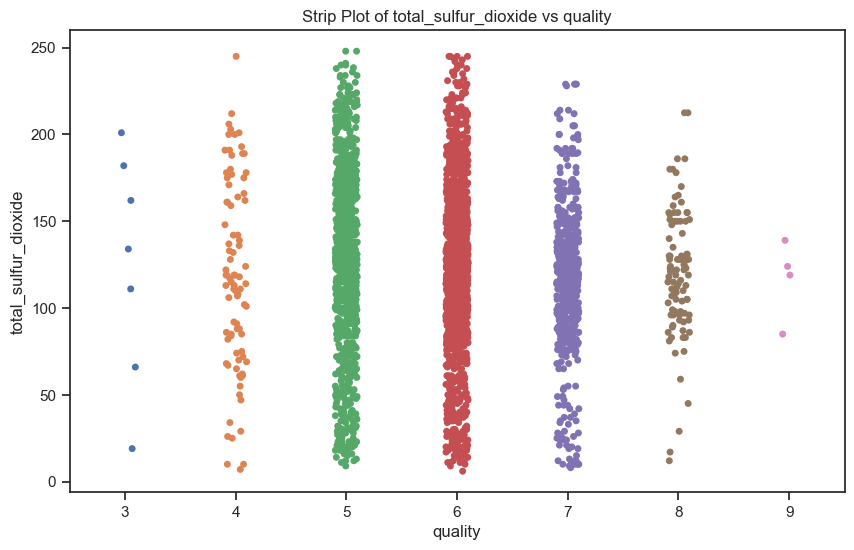

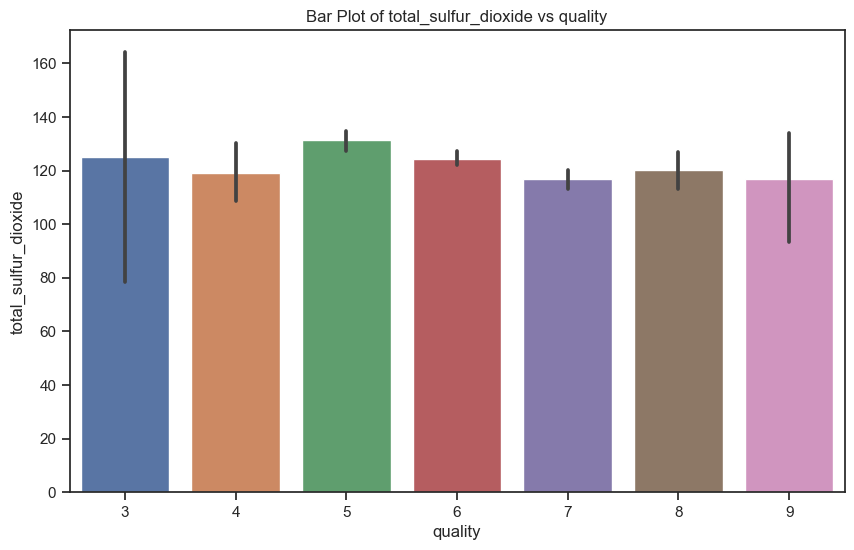

In [42]:
# quality vs. total_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'total_sulfur_dioxide')

In [43]:
# check for normal distribution
stats.shapiro(train.total_sulfur_dioxide)

ShapiroResult(statistic=0.9918590784072876, pvalue=4.983929935420406e-12)

In [44]:
# stats test
tstat, pval = stats.ttest_1samp(train.total_sulfur_dioxide, overall_mean)
tstat, pval

(132.20198426890911, 0.0)

In [45]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Bound sulfur dioxide (Continuous)

$H_{0}$ : there is not a relationship between wine quality and bound sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and bound sulfur dioxide

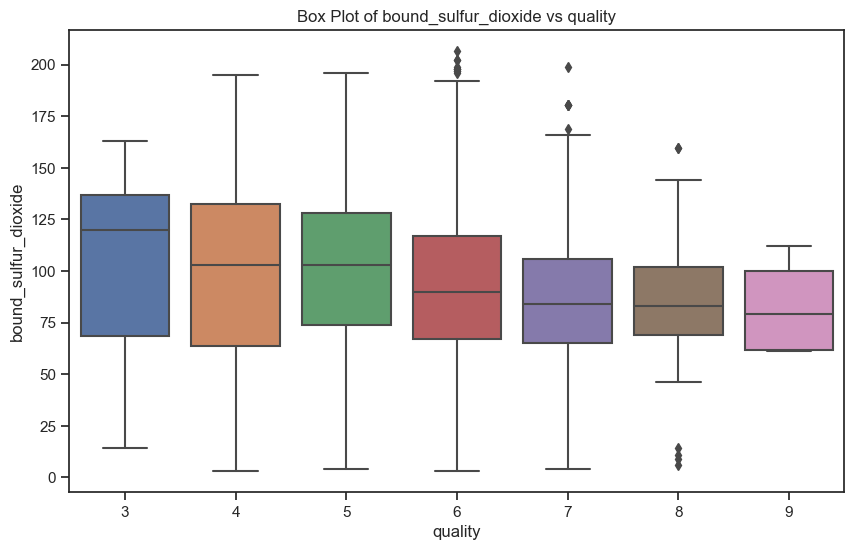

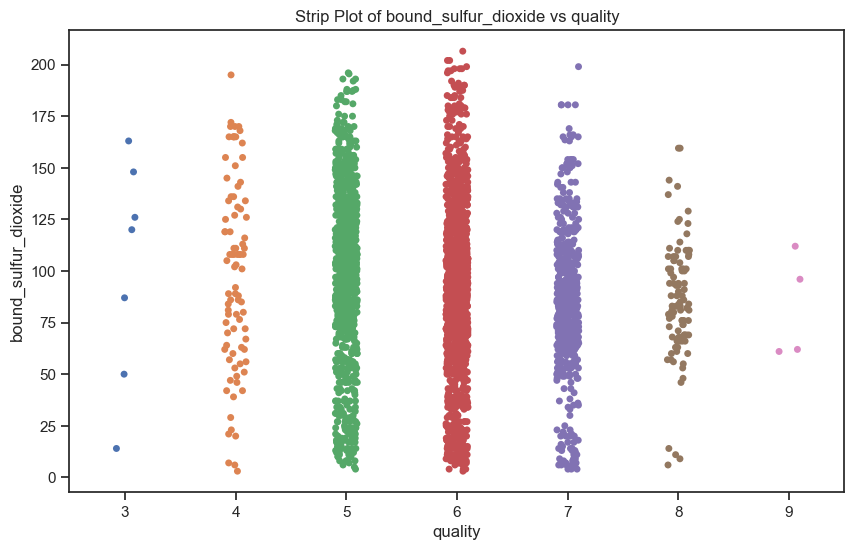

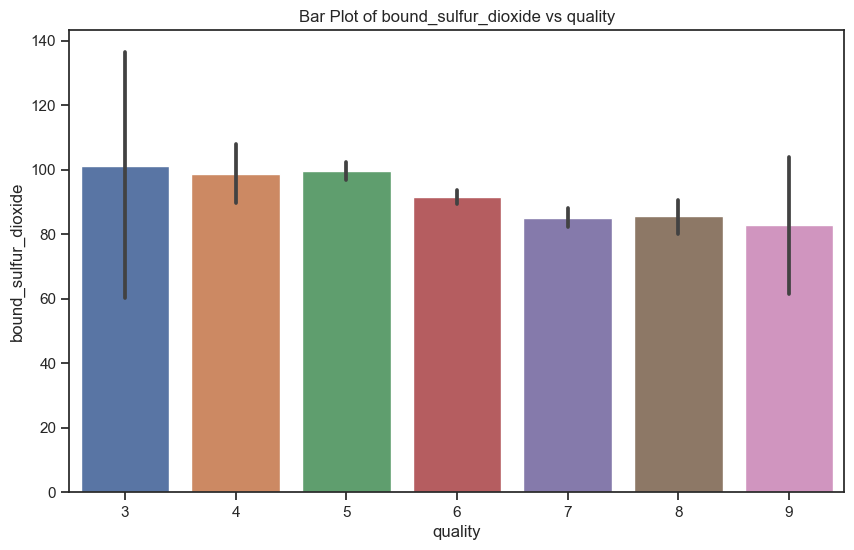

In [46]:
#quality vs. bound_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'bound_sulfur_dioxide')

In [47]:
# check for normal distribution
stats.shapiro(train.bound_sulfur_dioxide)

ShapiroResult(statistic=0.9921555519104004, pvalue=9.649607501938107e-12)

In [48]:
# stats test
tstat, pval = stats.ttest_1samp(train.bound_sulfur_dioxide, overall_mean)
tstat, pval

(118.08135289728173, 0.0)

In [49]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. Density (Continuous)

$H_{0}$ : there is not a relationship between wine quality and density

$H_{a}$ : there is a relationship between wine quality and density

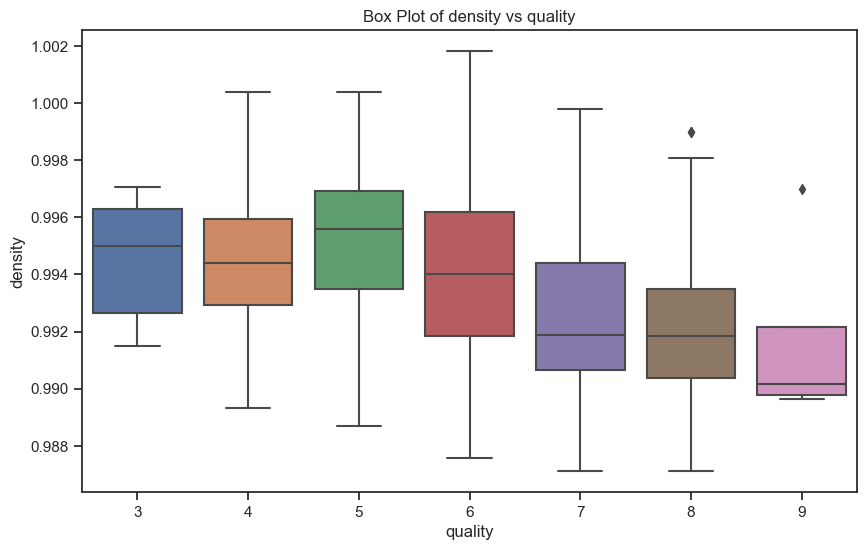

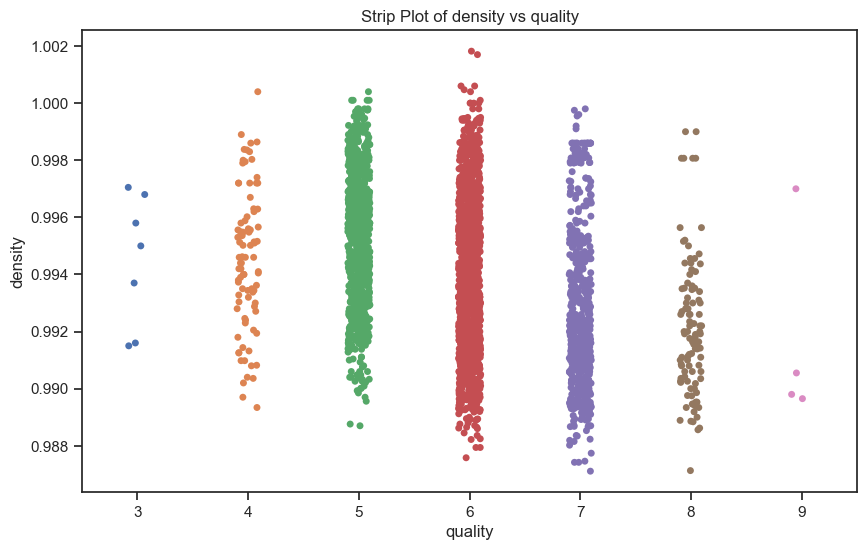

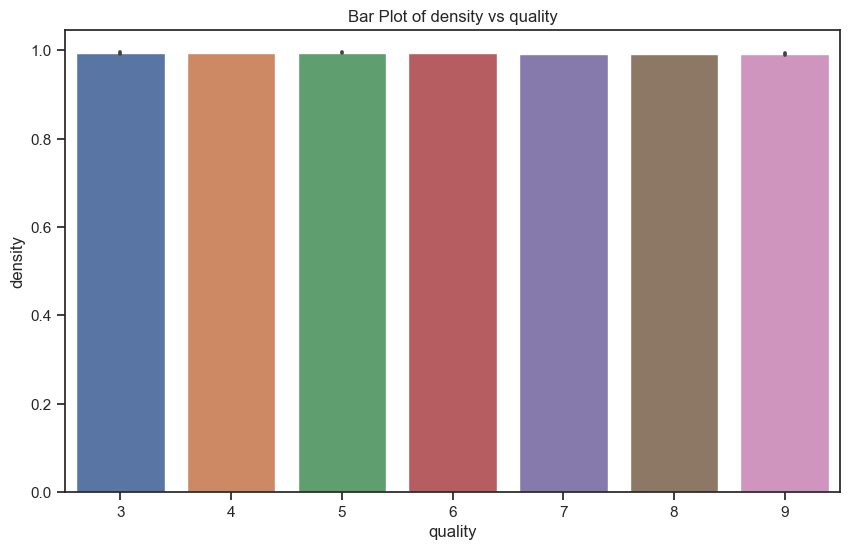

In [50]:
# quality vs. density
exp.plot_categorical_and_continuous_vars(train, 'quality', 'density')

In [51]:
# check for normal distribution
stats.shapiro(train.density)

ShapiroResult(statistic=0.9831632375717163, pvalue=1.9390517697332777e-18)

In [52]:
# stats test
tstat, pval = stats.ttest_1samp(train.density, overall_mean)
tstat, pval

(-96582.66305457067, 0.0)

In [53]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. pH(Continuous)

$H_{0}$ : there is not a relationship between wine quality and pH

$H_{a}$ : there is a relationship between wine quality and pH

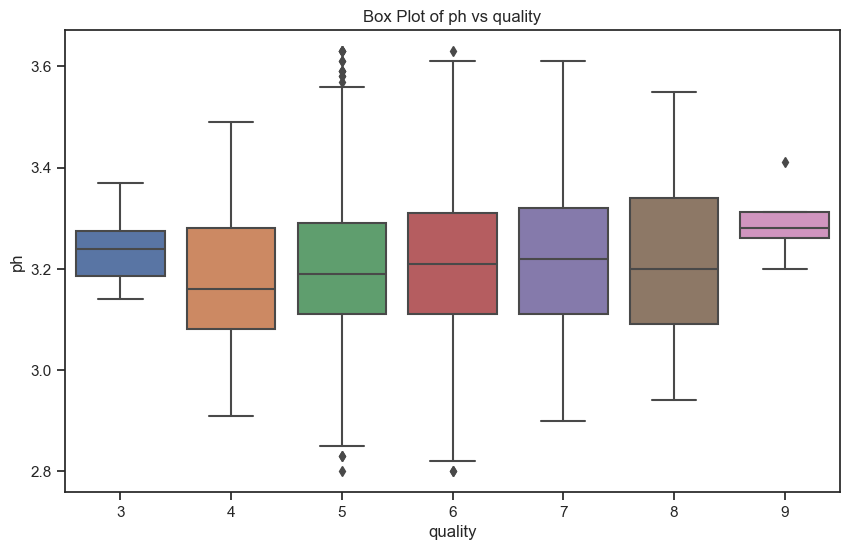

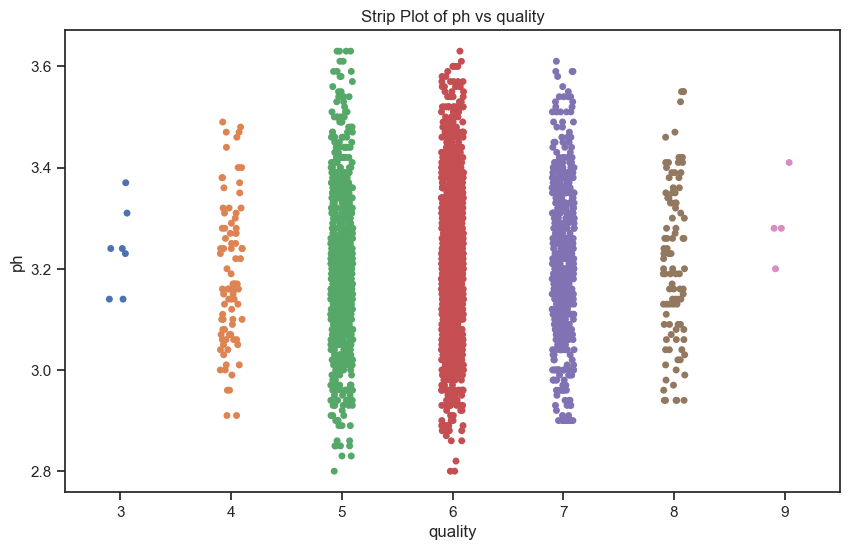

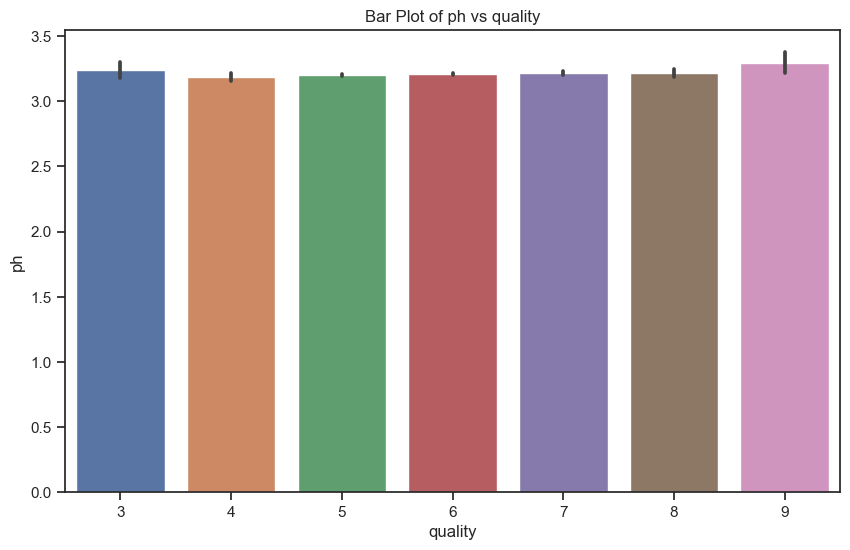

In [54]:
# quality vs. ph
exp.plot_categorical_and_continuous_vars(train, 'quality', 'ph')

In [55]:
# check for normal distribution
stats.shapiro(train.ph)

ShapiroResult(statistic=0.9960602521896362, pvalue=4.030621596484707e-07)

In [56]:
# stats test
tstat, pval = stats.ttest_1samp(train.ph, overall_mean)
tstat, pval

(-996.6201757650346, 0.0)

In [57]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


# Quality (Categorical) vs. sulphates (Continuous)

$H_{0}$ : there is not a relationship between wine quality and sulphates

$H_{a}$ : there is a relationship between wine quality and sulphates

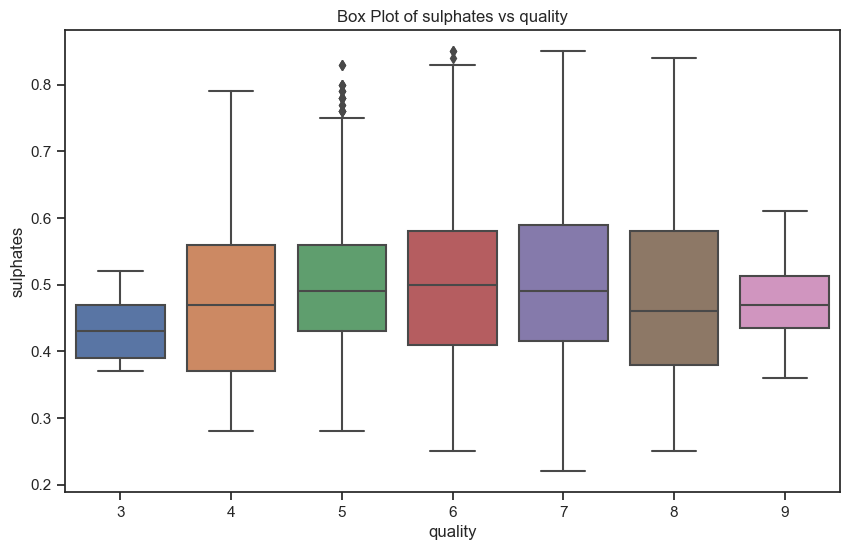

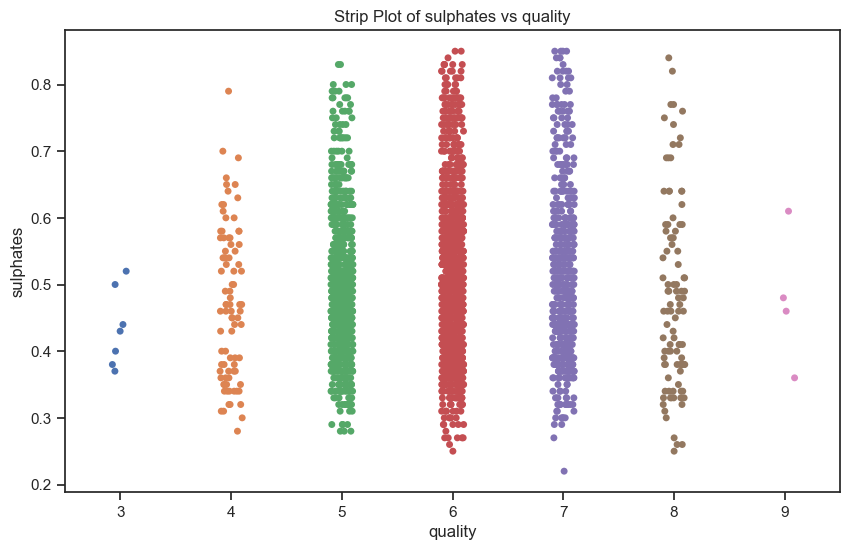

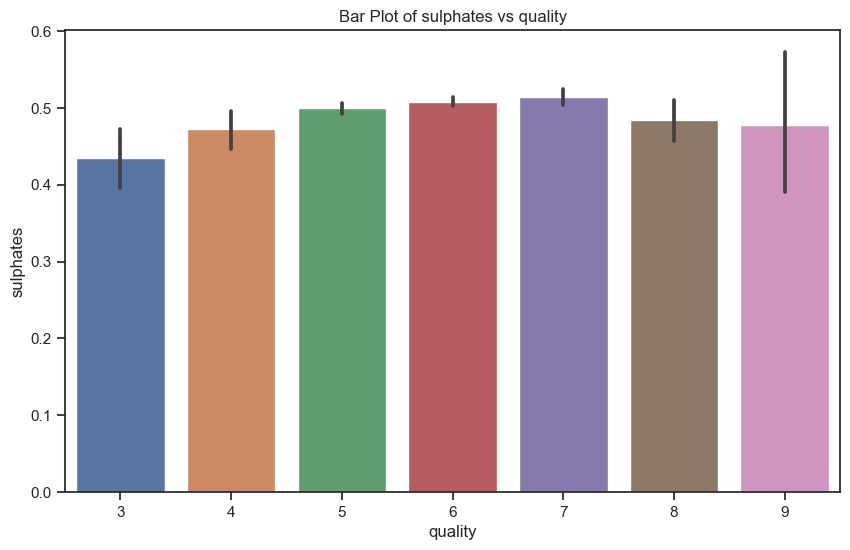

In [58]:
# quality vs. sulphates
exp.plot_categorical_and_continuous_vars(train, 'quality', 'sulphates')

In [59]:
# check for normal distribution
stats.shapiro(train.sulphates)

ShapiroResult(statistic=0.9710070490837097, pvalue=3.2209780433700565e-24)

In [60]:
# stats test
tstat, pval = stats.ttest_1samp(train.sulphates, overall_mean)
tstat, pval

(-2513.453359338533, 0.0)

In [61]:
if ((pval / 2) < alpha):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


In [62]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
12              7.9             0.180         0.37            1.20      0.040   
4343            5.8             0.220         0.25            1.50      0.024   
2416            7.0             0.160         0.26            6.85      0.047   
4684            6.0             0.240         0.34            1.00      0.036   
6383            7.0             0.655         0.16            2.10      0.074   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
12                   16.0                  75.0  0.99200  3.18       0.63   
4343                 21.0                 109.0  0.99234  3.37       0.58   
2416                 30.0                 220.0  0.99622  3.38       0.58   
4684                 52.0                 184.0  0.99097  3.44       0.44   
6383                  8.0                  25.0  0.99606  3.37       0.55   

      alcohol  quality   Type  White  bound_sulfur_dioxide  
12      10.80        5  White      1                  59.0  
4343    10.40        6  White      1                  88.0  
2416    10.10        6  White      1                 190.0  
4684    11.45        6  White      1                 132.0  
6383     9.70        5    Red      0                  17.0

# Scale data for clustering 


In [63]:
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)

In [64]:
X_train_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
12         0.653061          0.173913     0.589286        0.029762   0.301075   
4343       0.224490          0.243478     0.375000        0.047619   0.129032   
2416       0.469388          0.139130     0.392857        0.366071   0.376344   
4684       0.265306          0.278261     0.535714        0.017857   0.258065   
6383       0.469388          1.000000     0.214286        0.083333   0.666667   
...             ...               ...          ...             ...        ...   
3614       0.346939          0.521739     0.357143        0.386905   0.376344   
4586       0.142857          0.365217     0.607143        0.029762   0.182796   
4200       0.673469          0.278261     0.517857        0.029762   0.344086   
2073       0.387755          0.330435     0.446429        0.273810   0.354839   
2759       0.612245          0.173913     0.553571        0.303571   0.462366   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
12               0.178082              0.285124  0.332427  0.457831   
4343             0.246575              0.425620  0.355540  0.686747   
2416             0.369863              0.884298  0.619307  0.698795   
4684             0.671233              0.735537  0.262407  0.771084   
6383             0.068493              0.078512  0.608430  0.686747   
...                   ...                   ...       ...       ...   
3614             0.520548              0.599174  0.607070  0.373494   
4586             0.383562              0.520661  0.125085  0.578313   
4200             0.342466              0.392562  0.220258  0.277108   
2073             0.739726              0.756198  0.556764  0.614458   
2759             0.301370              0.570248  0.588035  0.530120   

      sulphates   alcohol  bound_sulfur_dioxide  
12     0.650794  0.428571              0.275184  
4343   0.571429  0.357143              0.417690  
2416   0.571429  0.303571              0.918919  
4684   0.349206  0.544643              0.633907  
6383   0.523810  0.232143              0.068796  
...         ...       ...                   ...  
3614   0.603175  0.142857              0.525799  
4586   0.222222  0.714286              0.481572  
4200   0.333333  0.732143              0.343980  
2073   0.904762  0.250000              0.633907  
2759   0.507937  0.321429              0.570025  

[3008 rows x 12 columns]